In [1]:
import pandas as pd
from random import shuffle

In [2]:
df  = pd.read_pickle('df3x.pickle')
df.head()

id  word_AAAA  word_AAAAAAAAH  word_AAAAAAAH  word_AAAAAH  \
0  1952749712        NaN             NaN            NaN          NaN   
1  1952766057        NaN             NaN            NaN          NaN   
2  1952827068        NaN             NaN            NaN          NaN   
3  1952858703        NaN             NaN            NaN          NaN   
4  1952862063        NaN             NaN            NaN          NaN   

   word_AAAAH  word_AAAGH  word_AAAH  word_AAAHH  word_AAAHHH    ...      \
0         NaN         NaN        NaN         NaN          NaN    ...       
1         NaN         NaN        NaN         NaN          NaN    ...       
2         NaN         NaN        NaN         NaN          NaN    ...       
3         NaN         NaN        NaN         NaN          NaN    ...       
4         NaN         NaN        NaN         NaN          NaN    ...       

   word_ZORA  word_ZORK  word_ZORRO  word_ZOYA  word_ZUCCHINI  \
0        NaN        NaN         NaN        NaN            NaN   
1        NaN        NaN         NaN        NaN            NaN   
2        NaN        NaN         NaN        NaN            NaN   
3        NaN        NaN         NaN        NaN            NaN   
4        NaN        NaN         NaN        NaN            NaN   

   word_ZUCKERBERG  word_ZULU  word_ZUMBA  word_ZURICH  word_ZWEI  
0              NaN        NaN         NaN          NaN        NaN  
1              NaN        NaN         NaN          NaN        NaN  
2              NaN        NaN         NaN          NaN        NaN  
3              NaN        NaN         NaN          NaN        NaN  
4              NaN        NaN         NaN          NaN        NaN  

[5 rows x 49058 columns]

In [3]:
clean = pd.read_pickle('df_clean.pickle')
clean.head()

id                                            content
0  1952749712  ACTUALLY PIECE RUIN HARM THROWING OTHER SOMETH...
1  1952766057  MANISH FLIRT BLAMING FEBRUARY PROFESSION OTHER...
2  1952827068  ONLINE SWEAR MANISH NEWS CONFESSED JUDGEMENT M...
3  1952858703  SITE ONLINE ASSIGNED UNTIL BLOCKS SWEAR UPSTAI...
4  1952862063  UPSTAIRS AIIVE REAIIZED SOMETHING OTHER SIEEPI...

In [4]:
falta = [x for x in list(clean.id) if x not in list(df.id)]
falta[:10]

['1953536039',
 '1953537227',
 '1953537569',
 '1953537621',
 '1953537664',
 '1953537974',
 '1953538162',
 '1953538380',
 '1953539162',
 '1953539835']

In [5]:
all_words = list(' '.join(list(clean.content)).split())
all_words_dict = list(set(all_words))
words = pd.DataFrame(columns=['word','count_word'])
words.word = all_words
words2 = words.groupby(['word']).sum()
words2 = words2.sort_values('count_word', ascending=False)
words2 = words2.reset_index()
w2 = list(words2['word'][:50000])
shuffle(w2)
w2[:10]

['PIETS',
 'RECTIFIED',
 'REARCOW',
 'PANAFRICAN',
 'PAPALETS',
 'POBOGU',
 'POTTHUR',
 'REDACTING',
 'PREMONITION',
 'OTHERNTHERE']

In [ ]:

clean = pd.read_pickle('df_clean.pickle')
df  = pd.read_pickle('df3x.pickle')
print(df.shape)
falta = [x for x in list(clean.id) if x not in list(df.id)]
clean = clean.set_index('id')
clean = clean.loc[falta]


cleanx = clean[:50]
d = pd.DataFrame()
for row in cleanx.iterrows():
    print('.',end='', flush=True)
    e = dict()
    idc = row[0]
    content = row[1][0].split()
    e['id'] = idc

    for w in content:
        if w in w2:
            e['word_'+str(w)] = True
    d = df.append(e, ignore_index=True)
df = df.append(d, ignore_index=True)
df.to_pickle('df3x.pickle')
print(df.shape)

In [ ]:
df

    "df = pd.DataFrame()\n",
    "train=train.head(16000)\n",
    "for word in words:\n",
    "    df[word] = train.txt.apply(lambda x: (word in x)*1)\n",
    "df.to_pickle('DONORSCHOOSE\\matrix.pickle')"

In [76]:
import pandas as pd
import numpy as np
pd.options.display.max_rows = 20
pd.options.display.max_columns = 999

In [2]:
data_clean = pd.read_pickle('df_clean.pickle')
data_clean.head()

id                                            content
0  1952749712  ACTUALLY PIECE RUIN HARM THROWING OTHER SOMETH...
1  1952766057  MANISH FLIRT BLAMING FEBRUARY PROFESSION OTHER...
2  1952827068  ONLINE SWEAR MANISH NEWS CONFESSED JUDGEMENT M...
3  1952858703  SITE ONLINE ASSIGNED UNTIL BLOCKS SWEAR UPSTAI...
4  1952862063  UPSTAIRS AIIVE REAIIZED SOMETHING OTHER SIEEPI...

In [3]:
all_words = list(' '.join(list(data_clean.content)).split())
all_words_dict = list(set(all_words))
words = pd.DataFrame(columns=['word','count_word'])
words.word = all_words
words2 = words.groupby(['word']).sum()
words2 = words2.sort_values('count_word', ascending=False)
words2 = words2.reset_index()
w2 = list(words2['word'][:50000])

In [14]:
print(len(w2))
x = 0
#df_final = data_clean
df_final = pd.read_pickle('df_final.pickle')
col = list(df_final.columns)
for word in w2:
    x += 1
    if ('word_'+str(word)) not in col:
        df_final['word_'+str(word)] = df_final.content.apply(lambda x: (word in x))
    if x % int(len(w2)/100) == 0:
        print(str(x),flush=True)
        df_final.to_pickle('df_final.pickle')
df_final

50000
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500
11000
11500
12000
12500
13000
13500
14000
14500
15000
15500
16000
16500
17000
17500
18000
18500
19000
19500
20000
20500
21000
21500
22000
22500
23000
23500
24000
24500
25000
25500
26000
26500
27000
27500
28000
28500
29000
29500
30000
30500
31000
31500
32000
32500
33000
33500
34000
34500
35000
35500
36000
36500
37000
37500
38000
38500
39000
39500
40000
40500
41000
41500
42000
42500
43000
43500
44000
44500
45000
45500
46000
46500
47000
47500
48000
48500
49000
49500
50000


id                                            content  \
0      1952749712  ACTUALLY PIECE RUIN HARM THROWING OTHER SOMETH...   
1      1952766057  MANISH FLIRT BLAMING FEBRUARY PROFESSION OTHER...   
2      1952827068  ONLINE SWEAR MANISH NEWS CONFESSED JUDGEMENT M...   
3      1952858703  SITE ONLINE ASSIGNED UNTIL BLOCKS SWEAR UPSTAI...   
4      1952862063  UPSTAIRS AIIVE REAIIZED SOMETHING OTHER SIEEPI...   
5      1952863503  DISTRICT BLAMING OTHER DISAPPEAR BELIEVE INQUI...   
6      1952869763  NEWS APPEAR BRESSLER CYANIDE SOMETHING OTHER B...   
7      1952869919  NEWS UNTIL APPEAR UPSTAIRS ALTHOUGH SEAMLESSLY...   
8      1952870004  NEWS UNTIL APPEAR UPSTAIRS SEAMLESSLY BRESSLER...   
9      1952870009  NEWS UNTIL APPEAR UPSTAIRS ALTHOUGH SEAMLESSLY...   
10     1952870366  SLIDE UNTIL SWEAR BUMS LEGS TRICKS PENNSYLVANI...   
11     1952874396  NEWS PIECE ROGUE FAINT CATTLE DITCH SENIOR SOM...   
12     1952876884  TOLLET DYLAN OTHER BELIEVE TIRE EFFECT DRESSED...   
13     1952877329  DOLL PARADISE TIMER MECHANIZED CROSS BUNKERS P...   
14     1952880881  WITH FLAT SEQUENCE THESE SUCK MEASURE SYPHILIS...   
15     1952882531  SIMPLY NEWS CHERRY LEGS LOTS FILM ACTUALLY SAB...   
16     1952886351  INDISTINCT RAPID HANK OTHER BELIEVE GENTLEMEN ...   
17     1952886417  CHERRY OTHER BELIEVE POSITIONS DRESSED EVENING...   
18     1952886762  RAPID HANK OTHER BELIEVE GENTLEMEN DESCRIBE BE...   
19     1952892201  NEWS BECOMING PIECE AIIVE HAIR SOMETHING SIEEP...   
20     1952892771  INDISTINCT WANDERED SPEEDING DYLAN OTHER FLAT ...   
21     1952893501  SIMPLY SWEAR WINCH PIECE SOMETHING PILOT BELIE...   
22     1952893697  SLIDE SYNDROME STARS FITS FLAT OTHER BELIEVE A...   
23     1952904698  CARROWS SWEAR POTTERS SIMPLY UNTIL LOTS PIECE ...   
24     1952905372  READERS DYLAN OTHER BELIEVE ANYWAYS TOUR HILLS...   
25     1952905564  UNTIL ASSIGNED ALTHOUGH BOUND WINCH SHOOTS CRO...   
26     1952909669  DISTRICT FITS OTHER CEREAL BELIEVE ANYWAYS QUI...   
27     1952911349  INDISTINCT BUMS FLIRT STARS OTHER DISAPPEAR BE...   
28     1952913068  DYLAN MCCARTNEY STARS OTHER FLAT HAMMOND BELIE...   
29     1952913240  UNTIL BLOCKS MURDERED ACTUALLY SOMETHING OTHER...   
...           ...                                                ...   
20664  1956250237  DOLL SWEAR UNTIL SIMPLY ALTHOUGH LEGS ACTUALLY...   
20665  1956250245  NEWS UNTIL APPEAR ADVERTISING ACTUALLY MENGELB...   
20666  1956250297  GOTO FITS OTHER BELIEVE OVERWHELMED MARCH TREY...   
20667  1956250684  SONS TOGETHER KOBA LAKE CAESARS WONDER SOLDIER...   
20668  1956250719  INDISTINCT CALF BLAMING FEBRUARY PATHS OTHER D...   
20669  1956250778  CALF SHREWD SITAS FORMALITIES STARS OTHER BELI...   
20670  1956250870  RADIATE STARS PROFESSION MARLON OTHER WORRIEDN...   
20671  1956251046  DOOMED FITS STARS OTHER DISAPPEAR BELIEVE CONF...   
20672  1956251089  OTHER FLAT DISAPPEAR TIRE QUIT TOUR TROPHIES G...   
20673  1956251110  WARFARE DISTRICT READERS DOOMED RAPID FORMALIT...   
20674  1956251169  ONLINE NEWS SIMPLY UPSTAIRS SMARTS INABILITY B...   
20675  1956251292  SEMMANGUDI PADMATIRTTHA PROFESSION OTHER TEACH...   
20676  1956251294  DOLL NEWS UNTIL MEANINGLESS LIGHTGREEN LEGS SH...   
20677  1956251539  INDISTINCT EXECUTION DOOMED BLAMING OTHER FLAT...   
20678  1956251629  INDISTINCT BLAMING OTHER DISAPPEAR BELIEVE QUI...   
20679  1956251630  NEWS UNTIL PUMPED ACTUALLY STANDIN LAWYER BLAM...   
20680  1956251638  SWEAR UNTIL PARA DEPENDS ACTUALLY SHOOTS LAWYE...   
20681  1956251695  INDISTINCT EXECUTION DOOMED BLAMING OTHER FLAT...   
20682  1956251855  JUVENILE OTHER CARNAL BELIEVE ANYWAYS OPPOSING...   
20683  1956251856  JUVENILE OTHER CARNAL BELIEVE ANYWAYS OPPOSING...   
20684  1956251958  INDISTINCT BUMS FITS STARS OTHER CEREAL OVERRI...   
20685  1956251959  BUMS FITS STARS OTHER CEREAL OVERRIDE DISAPPEA...   
20686  1956252517  ONLINE SWEAR UNTIL NEWS SIMPLY SCANNERS LEADER...   
20687  1956252518  ONLINE SWEAR UNTIL NEWS SIMPLY LEADE

In [7]:
df_final = pd.read_pickle('df_final.pickle')
df_final.describe()

id                                            content  \
count        20694                                              20694   
unique       20694                                              19083   
top     1953217280  ONLINE SWEAR MASTERFUL UPSTAIRS PUMPED COUSIN ...   
freq             1                                                  9   

       word_AAAA word_PENOLOGY word_PENSABA word_PENSA word_PENS word_PENRY  \
count      20694         20694        20694      20694     20694      20694   
unique         2             2            2          2         2          2   
top        False         False        False      False      True      False   
freq       20234         20693        20691      19140     17123      20691   

       word_PENROSES word_PENROSE      ...       word_QSOAMUE word_QSNG  \
count          20694        20694      ...              20694     20694   
unique             2            2      ...                  2         2   
top            False        False      ...              False     False   
freq           20680        20677      ...              20693     20693   

       word_QSMRPAADIGIAISQQ word_QTCLPQZPLYJYVBKLBADKAQEQMBM  \
count                  20694                            20694   
unique                     2                                2   
top                    False                            False   
freq                   20693                            20693   

       word_QTCSBZODMAUDPQSCQCCMQQIA  \
count                          20694   
unique                             2   
top                            False   
freq                           20693   

       word_QTDBTQYOSAQCCDUDSAMRMBICRPLQEMTEIAEVB  \
count                                       20694   
unique                                          2   
top                                         False   
freq                                        20693   

       word_QTDVDSGSBDCVTBCJYUYQWRV word_QTOUPZQIUPQQEAIALRTSTVVNBSYLBXXAPUSQ  \
count                         20694                                     20694   
unique                            2                                         2   
top                           False                                     False   
freq                          20693                                     20693   

       word_QTOUPS word_QTOQTYTEX  
count        20694          20694  
unique           2              2  
top          False          False  
freq         20693          20693  

[4 rows x 50002 columns]

In [8]:
df_final.shape

(20694, 50002)

In [23]:
dfg = df_final
dfg

id                                            content  \
0      1952749712  ACTUALLY PIECE RUIN HARM THROWING OTHER SOMETH...   
1      1952766057  MANISH FLIRT BLAMING FEBRUARY PROFESSION OTHER...   
2      1952827068  ONLINE SWEAR MANISH NEWS CONFESSED JUDGEMENT M...   
3      1952858703  SITE ONLINE ASSIGNED UNTIL BLOCKS SWEAR UPSTAI...   
4      1952862063  UPSTAIRS AIIVE REAIIZED SOMETHING OTHER SIEEPI...   
5      1952863503  DISTRICT BLAMING OTHER DISAPPEAR BELIEVE INQUI...   
6      1952869763  NEWS APPEAR BRESSLER CYANIDE SOMETHING OTHER B...   
7      1952869919  NEWS UNTIL APPEAR UPSTAIRS ALTHOUGH SEAMLESSLY...   
8      1952870004  NEWS UNTIL APPEAR UPSTAIRS SEAMLESSLY BRESSLER...   
9      1952870009  NEWS UNTIL APPEAR UPSTAIRS ALTHOUGH SEAMLESSLY...   
10     1952870366  SLIDE UNTIL SWEAR BUMS LEGS TRICKS PENNSYLVANI...   
11     1952874396  NEWS PIECE ROGUE FAINT CATTLE DITCH SENIOR SOM...   
12     1952876884  TOLLET DYLAN OTHER BELIEVE TIRE EFFECT DRESSED...   
13     1952877329  DOLL PARADISE TIMER MECHANIZED CROSS BUNKERS P...   
14     1952880881  WITH FLAT SEQUENCE THESE SUCK MEASURE SYPHILIS...   
15     1952882531  SIMPLY NEWS CHERRY LEGS LOTS FILM ACTUALLY SAB...   
16     1952886351  INDISTINCT RAPID HANK OTHER BELIEVE GENTLEMEN ...   
17     1952886417  CHERRY OTHER BELIEVE POSITIONS DRESSED EVENING...   
18     1952886762  RAPID HANK OTHER BELIEVE GENTLEMEN DESCRIBE BE...   
19     1952892201  NEWS BECOMING PIECE AIIVE HAIR SOMETHING SIEEP...   
20     1952892771  INDISTINCT WANDERED SPEEDING DYLAN OTHER FLAT ...   
21     1952893501  SIMPLY SWEAR WINCH PIECE SOMETHING PILOT BELIE...   
22     1952893697  SLIDE SYNDROME STARS FITS FLAT OTHER BELIEVE A...   
23     1952904698  CARROWS SWEAR POTTERS SIMPLY UNTIL LOTS PIECE ...   
24     1952905372  READERS DYLAN OTHER BELIEVE ANYWAYS TOUR HILLS...   
25     1952905564  UNTIL ASSIGNED ALTHOUGH BOUND WINCH SHOOTS CRO...   
26     1952909669  DISTRICT FITS OTHER CEREAL BELIEVE ANYWAYS QUI...   
27     1952911349  INDISTINCT BUMS FLIRT STARS OTHER DISAPPEAR BE...   
28     1952913068  DYLAN MCCARTNEY STARS OTHER FLAT HAMMOND BELIE...   
29     1952913240  UNTIL BLOCKS MURDERED ACTUALLY SOMETHING OTHER...   
...           ...                                                ...   
20664  1956250237  DOLL SWEAR UNTIL SIMPLY ALTHOUGH LEGS ACTUALLY...   
20665  1956250245  NEWS UNTIL APPEAR ADVERTISING ACTUALLY MENGELB...   
20666  1956250297  GOTO FITS OTHER BELIEVE OVERWHELMED MARCH TREY...   
20667  1956250684  SONS TOGETHER KOBA LAKE CAESARS WONDER SOLDIER...   
20668  1956250719  INDISTINCT CALF BLAMING FEBRUARY PATHS OTHER D...   
20669  1956250778  CALF SHREWD SITAS FORMALITIES STARS OTHER BELI...   
20670  1956250870  RADIATE STARS PROFESSION MARLON OTHER WORRIEDN...   
20671  1956251046  DOOMED FITS STARS OTHER DISAPPEAR BELIEVE CONF...   
20672  1956251089  OTHER FLAT DISAPPEAR TIRE QUIT TOUR TROPHIES G...   
20673  1956251110  WARFARE DISTRICT READERS DOOMED RAPID FORMALIT...   
20674  1956251169  ONLINE NEWS SIMPLY UPSTAIRS SMARTS INABILITY B...   
20675  1956251292  SEMMANGUDI PADMATIRTTHA PROFESSION OTHER TEACH...   
20676  1956251294  DOLL NEWS UNTIL MEANINGLESS LIGHTGREEN LEGS SH...   
20677  1956251539  INDISTINCT EXECUTION DOOMED BLAMING OTHER FLAT...   
20678  1956251629  INDISTINCT BLAMING OTHER DISAPPEAR BELIEVE QUI...   
20679  1956251630  NEWS UNTIL PUMPED ACTUALLY STANDIN LAWYER BLAM...   
20680  1956251638  SWEAR UNTIL PARA DEPENDS ACTUALLY SHOOTS LAWYE...   
20681  1956251695  INDISTINCT EXECUTION DOOMED BLAMING OTHER FLAT...   
20682  1956251855  JUVENILE OTHER CARNAL BELIEVE ANYWAYS OPPOSING...   
20683  1956251856  JUVENILE OTHER CARNAL BELIEVE ANYWAYS OPPOSING...   
20684  1956251958  INDISTINCT BUMS FITS STARS OTHER CEREAL OVERRI...   
20685  1956251959  BUMS FITS STARS OTHER CEREAL OVERRIDE DISAPPEA...   
20686  1956252517  ONLINE SWEAR UNTIL NEWS SIMPLY SCANNERS LEADER...   
20687  1956252518  ONLINE SWEAR UNTIL NEWS SIMPLY LEADE

In [24]:
dfg['total'] = dfg.iloc[:,2:].sum(axis=1)

In [25]:
dfg.total

0         376
1         734
2         475
3         505
4         225
5         583
6         343
7         561
8         561
9         562
10        590
11        356
12        727
13        498
14         80
15        384
16        810
17        534
18        766
19        349
20        581
21        264
22        755
23        491
24        610
25        517
26        500
27        674
28        649
29        208
         ... 
20664     398
20665     457
20666     830
20667     112
20668     590
20669     716
20670    1078
20671     804
20672     582
20673    1143
20674     492
20675     703
20676     417
20677     625
20678     535
20679     501
20680     508
20681     630
20682     658
20683     619
20684     737
20685     650
20686     532
20687     485
20688     748
20689     646
20690     176
20691     657
20692     338
20693     830
Name: total, Length: 20694, dtype: int64

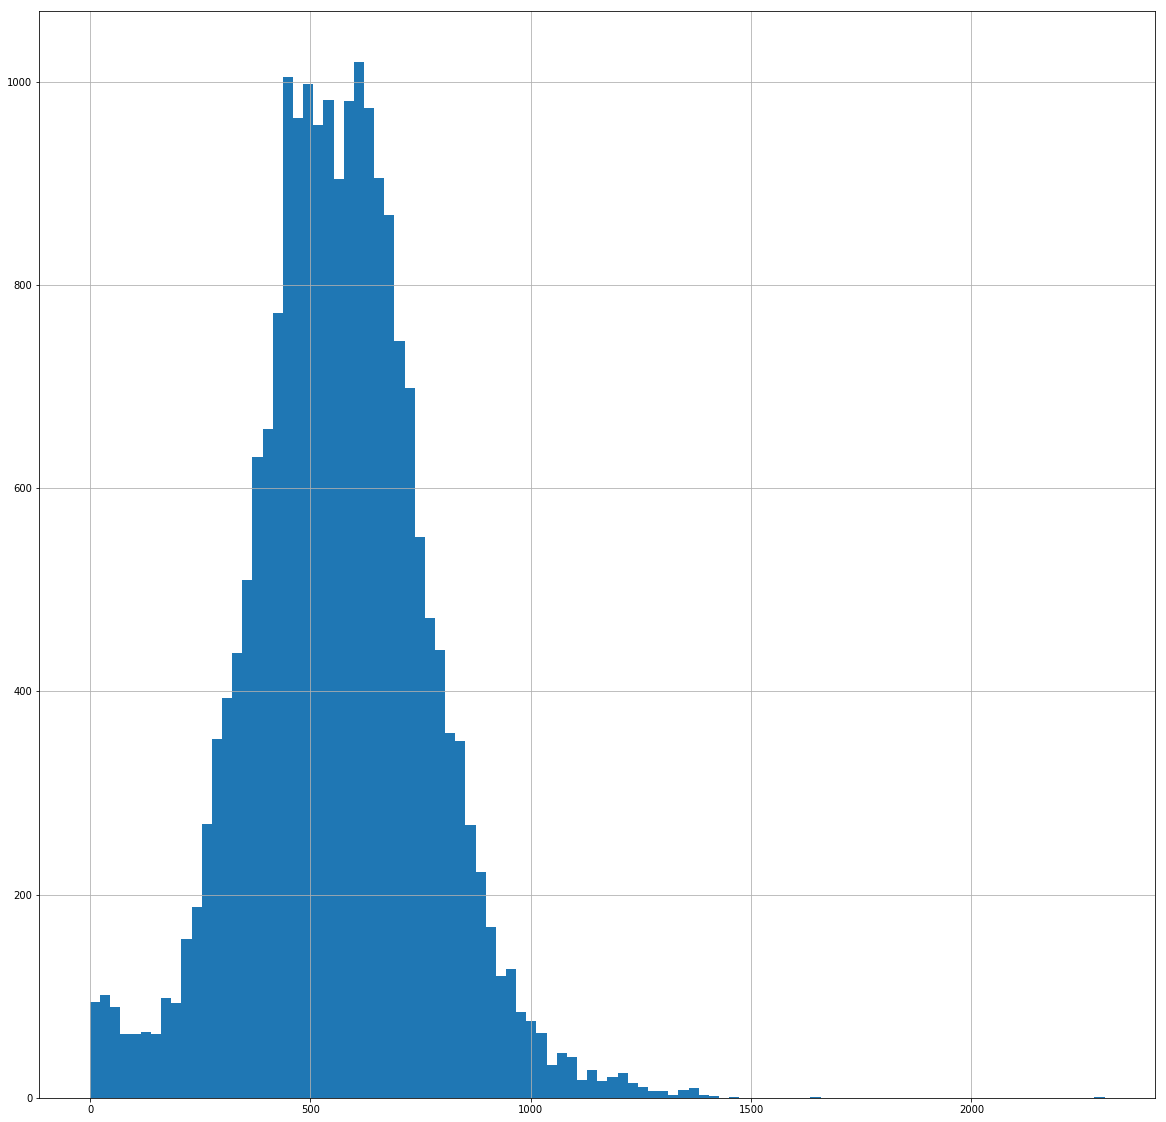

In [29]:
dfg['total'].hist(figsize=(20,20), bins=100)

In [31]:
dfg = dfg.sort_values('total', ascending = False)
dfg

id                                            content  \
11204  1954790655  WEALT DOOMED SQURE ENSUING BLUTFAHNE REJECTS E...   
7880   1954175152  NOCHENPARA UPCOUNT READERS UPHAPPY UPWHATS HAC...   
3108   1953050724  ICHING CREATIONS CONSTIPATION OSTRACIZED STARS...   
19040  1956025820  SUICIDEYOUVE FLIRT BLAMING GORY TODAYCOME BLUR...   
5579   1953440967  REACHAROUND DOOMED STARS OTHER ARMING INTERROG...   
15787  1955501475  WARFARE INDISTINCT CREATIONS DISTRICT OSTRACIZ...   
7060   1953819043  CREATIONS BERTS SCOTTISH SYNDROME CALF ADMIRAB...   
15788  1955501476  WARFARE CREATIONS DISTRICT OSTRACIZED STARS YU...   
18828  1955995528  EVERYONENWHO DEFAULTPROBABLY CORDUROYS DEFAULT...   
19554  1956102715  INDISTINCT DISTRICT DOOMED CRYOGENIC RAPID DUL...   
20542  1956236843  INDISTINCT DISTRICT DOOMED CRYOGENIC RAPID DUL...   
16286  1955585540  JUVENILE SYNDROME STICKITS PLEABARGAINED OTHER...   
19555  1956102716  DISTRICT DOOMED CRYOGENIC RAPID DULLES FEBRUAR...   
20543  1956236848  DISTRICT DOOMED CRYOGENIC RAPID DULLES FEBRUAR...   
19564  1956104217  DISTRICT DOOMED CRYOGENIC RAPID DULLES FEBRUAR...   
15694  1955490090  INDISTINCT LOMBOK HANK CAMPAIGNED DUTIES PROFE...   
3130   1953054115  WARFARE EXECUTION DOOMED WANDERED SCOTTISH DIS...   
15686  1955489827  INDISTINCT LOMBOK TOLLET HANK CAMPAIGNED DUTIE...   
948    1955489933  INDISTINCT LOMBOK HANK CAMPAIGNED DUTIES PROFE...   
15693  1955489934  LOMBOK HANK CAMPAIGNED DUTIES PROFESSION OTHER...   
15738  1955497328  LOMBOK HANK CAMPAIGNED DUTIES PROFESSION OTHER...   
16653  1955632369  LOMBOK HANK CAMPAIGNED DUTIES PROFESSION OTHER...   
15687  1955489828  LOMBOK HANK CAMPAIGNED DUTIES PROFESSION OTHER...   
7014   1953811358  WARFARE INDISTINCT FATHERED FEBRUARY PATHS PRO...   
19808  1956135956  SLIDE INDISTINCT DISTRICT SAMS DYLAN HANK FEBR...   
15378  1955454767  LOMBOK MANYOUCHARIAN UNCLEANDY HANK CAMPAIGNED...   
9787   1954507028  DISTRICT EXECUTION VISAS OTHER DISAPPEAR BELIE...   
9569   1954471086  CALF MONTANAIN RAPID ASISAID FACTORYFARMS IPLA...   
6968   1953802415  WARFARE FATHERED FEBRUARY PATHS PROFESSION CON...   
19155  1956045053  WARFARE OTHER PERSONALITIES BELIEVE POSITIONS ...   
...           ...                                                ...   
16216  1955576183  CLEARLY UNDERSTAND SOMETHING WITH OTHER NAKED ...   
14328  1955302622  SIEG SOLDIERS HALT NEED FELL MASTER MORE HAVE ...   
14899  1955393035  SEVERAL TOGETHER GRUDGE WITH DECADES WONT ALRE...   
5369   1953385824  WILLING HASAN DAUGHTER NAME ABOUT LETS KARACHI...   
14413  1955312666  NOSE NURSING STOMACH ALWAYS WOMAN BOSSY MAJOR ...   
17456  1955760881  DAUGHTER WHICH BACK NATURE BROKEN GIVE THAT GA...   
865    1955309951  NOSE SMAJOR NURSING STOMACH ALWAYS WOMAN BOSSY...   
4586   1953257310  ENERGYTORRENTCOM TEAM RAMONA MOTLEY ENERGYTORR...   
6542   1953700744  WITH HONOR THESE HERE DANGER KILLING HELP KILL...   
15437  1955459026  COINCIDENCE OPPORTUNITY LISTENING STAY FIND WI...   
14965  1955398020  MUST LEAVE CLEAR SHIP WRECKAGE HIDDEN MISSION ...   
6477   1953685599  WITH HONOR THESE HERE DANGER KILLING HELP KILL...   
6510   1953692002  WITH HONOR THESE HERE DANGER KILLING HELP KILL...   
19778  1956131839  DONT MONEY CHOOSE HAVE WHERE BITCH FUCK DOING ...   
2382   1952962935  TOGETHER MONKEYS STUPID LIKE SIGN CIRCUS WEAK ...   
16224  1955577312  VIPWWWOPENSUBTITLESORG NETPILOT WWWOPENSUBTITL...   
14000  1955254560  WHORE COCK SHAMELESS HEADSCARF DONT MUSLIM KUN...   
2400   1952964601  TOGETHER MONKEYS INJURED STUPID SERIOUSLY LIKE...   
13232  1955106124  THANK SPIRIT BEFORE KEEP LETTER DINNER SOMETHI...   
19858  1956141580  ONCE KEEP KILL CATTLE WHEN HAVE HERE LOCKWOOD ...   
17734  1955810803                           SSSS WWWOPENSUBTITLESORG   
6005   1953564216  LETS THANKS DADDY LIFE MARCO DOES BELIEVE HERE...   
4330   1953214760  MARKED COLLISIONS SUBSSA NAME MARGINR SCRIPTTY...   
8978   1954373560  UPON LADYBUG WITH STORY CRICKETS CIC

In [34]:
data = pd.read_pickle('data.pickle')
print(data.columns)
data.head()

Index(['IDMovie', 'IDMovieImdb', 'IDSubMovieFile', 'IDSubtitle',
       'IDSubtitleFile', 'ISO639', 'InfoFormat', 'InfoOther',
       'InfoReleaseGroup', 'LanguageName', 'MatchedBy', 'MovieByteSize',
       'MovieFPS', 'MovieHash', 'MovieImdbRating', 'MovieKind', 'MovieName',
       'MovieNameEng', 'MovieReleaseName', 'MovieTimeMS', 'MovieYear',
       'QueryCached', 'QueryNumber', 'QueryParameters', 'Score',
       'SeriesEpisode', 'SeriesIMDBParent', 'SeriesSeason', 'SubActualCD',
       'SubAddDate', 'SubAuthorComment', 'SubAutoTranslation', 'SubBad',
       'SubComments', 'SubDownloadLink', 'SubDownloadsCnt', 'SubEncoding',
       'SubFeatured', 'SubFileName', 'SubForeignPartsOnly', 'SubFormat',
       'SubFromTrusted', 'SubHD', 'SubHash', 'SubHearingImpaired',
       'SubLanguageID', 'SubLastTS', 'SubRating', 'SubSize', 'SubSumCD',
       'SubSumVotes', 'SubTSGroup', 'SubTSGroupHash', 'SubTranslator',
       'SubtitlesLink', 'UserID', 'UserNickName', 'UserRank',
       'ZipDownloa

IDMovie IDMovieImdb IDSubMovieFile IDSubtitle IDSubtitleFile ISO639  \
0  689825       69049              0    7528673     1956105445     en   
1  689825       69049              0    7528674     1956105446     en   
2  689825       69049              0    7595528     1956171406     en   
0  699087      192528              0    7570249     1956146520     en   
1  699087      192528              0    7570248     1956146519     en   

  InfoFormat InfoOther InfoReleaseGroup LanguageName  \
0     WEB-DL   Netflix              NTG      English   
1     WEB-DL   Netflix              NTG      English   
2              Netflix                       English   
0       HDTV                        EVO      English   
1       HDTV                        EVO      English   

                         ...                         SubSumCD SubSumVotes  \
0                        ...                                1           0   
1                        ...                                1           0   
2                        ...                                1           0   
0                        ...                                1           1   
1                        ...                                1           1   

  SubTSGroup                    SubTSGroupHash SubTranslator  \
0          1  120adac1b7dba3578179fe89238db0c4                 
1          1  120adac1b7dba3578179fe89238db0c4                 
2          1  120adac1b7dba3578179fe89238db0c4                 
0          1  cd54e7281ad51ebbf5df4bfcb0552f88                 
1          1  cd54e7281ad51ebbf5df4bfcb0552f88                 

                                       SubtitlesLink   UserID UserNickName  \
0  http://www.opensubtitles.org/en/subtitles/7528...  6141753     Scooby74   
1  http://www.opensubtitles.org/en/subtitles/7528...  6141753     Scooby74   
2  http://www.opensubtitles.org/en/subtitles/7595...        0                
0  http://www.opensubtitles.org/en/subtitles/7570...        0                
1  http://www.opensubtitles.org/en/subtitles/7570...        0                

        UserRank                                    ZipDownloadLink  
0  administrator  http://dl.opensubtitles.org/en/download/src-ap...  
1  administrator  http://dl.opensubtitles.org/en/download/src-ap...  
2                 http://dl.opensubtitles.org/en/download/src-ap...  
0                 http://dl.opensubtitles.org/en/download/src-ap...  
1                 http://dl.opensubtitles.org/en/download/src-ap...  

[5 rows x 59 columns]

In [56]:
data['IDMovieImdb'] = data['IDMovieImdb'].apply(int)
data.dtypes

IDMovie                 object
IDMovieImdb              int64
IDSubMovieFile          object
IDSubtitle              object
IDSubtitleFile          object
ISO639                  object
InfoFormat              object
InfoOther               object
InfoReleaseGroup        object
LanguageName            object
MatchedBy               object
MovieByteSize           object
MovieFPS                object
MovieHash               object
MovieImdbRating         object
MovieKind               object
MovieName               object
MovieNameEng            object
MovieReleaseName        object
MovieTimeMS             object
MovieYear               object
QueryCached            float64
QueryNumber             object
QueryParameters         object
Score                  float64
SeriesEpisode           object
SeriesIMDBParent        object
SeriesSeason            object
SubActualCD             object
SubAddDate              object
SubAuthorComment        object
SubAutoTranslation      object
SubBad  

In [35]:
movie = pd.read_pickle('final.pickle')
print(movie.columns)
movie.head()

Index(['tconst', 'titleType', 'primaryTitle', 'originalTitle', 'isAdult',
       'startYear', 'endYear', 'runtimeMinutes', 'genres', 'averageRating',
       'numVotes'],
      dtype='object')


tconst titleType            primaryTitle           originalTitle  \
0  tt0000001     short              Carmencita              Carmencita   
1  tt0000002     short  Le clown et ses chiens  Le clown et ses chiens   
2  tt0000003     short          Pauvre Pierrot          Pauvre Pierrot   
3  tt0000004     short             Un bon bock             Un bon bock   
4  tt0000005     short        Blacksmith Scene        Blacksmith Scene   

   isAdult  startYear  endYear  runtimeMinutes                    genres  \
0    False     1894.0      NaN             1.0         Documentary,Short   
1    False     1892.0      NaN             5.0           Animation,Short   
2    False     1892.0      NaN             4.0  Animation,Comedy,Romance   
3    False     1892.0      NaN             NaN           Animation,Short   
4    False     1893.0      NaN             1.0              Comedy,Short   

   averageRating  numVotes  
0            5.8      1486  
1            6.4       179  
2            6.6      1119  
3            6.4       109  
4            6.2      1822

In [48]:
data[data['IDMovieImdb'] == '192528']['MovieName']


0    Heaven & Hell
1    Heaven & Hell
Name: MovieName, dtype: object

In [38]:
movie[movie['tconst'] == 'tt0192528']

tconst titleType   primaryTitle   originalTitle  isAdult  \
122549  tt0192528     movie  Heaven & Hell  Reverse Heaven    False   

        startYear  endYear  runtimeMinutes genres  averageRating  numVotes  
122549     2018.0      NaN           104.0  Drama            4.1        68

In [50]:
def tconst_to_imdb(string):
    return int(string[2:])

movie['IDMovieImdb'] = movie['tconst'].apply(tconst_to_imdb)

In [80]:
movie

tconst  titleType  \
0       tt0000001      short   
1       tt0000002      short   
2       tt0000003      short   
3       tt0000004      short   
4       tt0000005      short   
5       tt0000006      short   
6       tt0000007      short   
7       tt0000008      short   
8       tt0000009      movie   
9       tt0000010      short   
...           ...        ...   
922759  tt9915906  tvEpisode   
922760  tt9915910  tvEpisode   
922761  tt9916114  tvEpisode   
922762  tt9916192    tvMovie   
922763  tt9916316  tvEpisode   
922764  tt9916380   tvSeries   
922765  tt9916420  tvEpisode   
922766  tt9916460    tvMovie   
922767  tt9916720      short   
922768  tt9916766  tvEpisode   

                                             primaryTitle  \
0                                              Carmencita   
1                                  Le clown et ses chiens   
2                                          Pauvre Pierrot   
3                                             Un bon bock   
4                                        Blacksmith Scene   
5                                       Chinese Opium Den   
6             Corbett and Courtney Before the Kinetograph   
7                  Edison Kinetoscopic Record of a Sneeze   
8                                              Miss Jerry   
9                                     Exiting the Factory   
...                                                   ...   
922759  The World in Shock! The Fifth Emperor of the S...   
922760                                      Episode #1.34   
922761                                Nothing But Truffle   
922762         Danielle Darrieux: Il est poli d'être gai!   
922763                          Tim Mälzer vs. Max Strohe   
922764                                Meie aasta Aafrikas   
922765                                      Episode #21.1   
922766                                          Pink Taxi   
922767                                          The Nun 2   
922768                                     Episode #10.15   

                                            originalTitle  isAdult  startYear  \
0                                              Carmencita    False     1894.0   
1                                  Le clown et ses chiens    False     1892.0   
2                                          Pauvre Pierrot    False     1892.0   
3                                             Un bon bock    False     1892.0   
4                                        Blacksmith Scene    False     1893.0   
5                                       Chinese Opium Den    False     1894.0   
6             Corbett and Courtney Before the Kinetograph    False     1894.0   
7                  Edison Kinetoscopic Record of a Sneeze    False     1894.0   
8                                              Miss Jerry    False     1894.0   
9                     La sortie de l'usine Lumière à Lyon    False     1895.0   
...                                                   ...      ...        ...   
922759  The World in Shock! The Fifth Emperor of the S...    False     2019.0   
922760                                      Episode #1.34    False     2019.0   
922761                                Nothing But Truffle    False     2019.0   
922762         Danielle Darrieux: Il est poli d'être gai!    False     2019.0   
922763                          Tim Mälzer vs. Max Strohe    False     2019.0   
922764                                Meie aasta Aafrikas    False     2019.0   
922765                                      Episode #21.1    False     2019.0   
922766                                          Pink Taxi    False     2019.0   
922767                                          The Nun 2    False     2019.0   
922768                                     Episode #10.15    False     2019.0   

        endYear  runtimeMinutes                      genres  averageRating  \
0           NaN             1.0           Documentary,Short            5.8   
1           NaN         

In [79]:
total = pd.merge(data, movie, how='inner', on='IDMovieImdb', sort=True,
         suffixes=('_data', '_movie'))
total

IDMovie  IDMovieImdb IDSubMovieFile IDSubtitle IDSubtitleFile ISO639  \
0      689825        69049              0    7528673     1956105445     en   
1      689825        69049              0    7528674     1956105446     en   
2      689825        69049              0    7595528     1956171406     en   
3      141552       146592              0    4733037     1953279158     en   
4      141552       146592              0    5809886     1954388171     en   
5      141552       146592              0    4733459     1953279599     en   
6      141552       146592              0    4733459     1953279600     en   
7       84373       154039              0    4262080     1952953923     en   
8      139958       176694              0    6934938     1955515566     en   
9      139958       176694              0    4708271     1953254624     en   
...       ...          ...            ...        ...            ...    ...   
68128  744224      9617546              0    7713510     1956287500     en   
68129  744224      9617546              0    7712936     1956286927     en   
68130  734204      9659470              0    7695320     1956269919     en   
68131  734204      9659470              0    7695251     1956269848     en   
68132  732420      9676614              0    7693234     1956267990     en   
68133  732420      9676614              0    7692833     1956267587     en   
68134  721916      9815714              0    7676967     1956251903     en   
68135  721916      9815714              0    7676966     1956251902     en   
68136  721916      9815714              0    7692922     1956267682     en   
68137  719349      9828428              0    7668548     1956243476     en   

      InfoFormat InfoOther InfoReleaseGroup LanguageName MatchedBy  \
0         WEB-DL   Netflix              NTG      English    imdbid   
1         WEB-DL   Netflix              NTG      English    imdbid   
2                  Netflix                       English    imdbid   
3                                                English    imdbid   
4                      PAL                       English    imdbid   
5                                                English    imdbid   
6                                                English    imdbid   
7                                                English    imdbid   
8                                                English    imdbid   
9                                                English    imdbid   
...          ...       ...              ...          ...       ...   
68128     WEBRip                      SiGMA      English    imdbid   
68129     WEBRip                      SiGMA      English    imdbid   
68130     WEB-DL                       CMRG      English    imdbid   
68131     WEB-DL                       CMRG      English    imdbid   
68132     WEB-DL                      AJP69      English    imdbid   
68133     WEBRip                      AJP69      English    imdbid   
68134     WEB-DL   Netflix             CMRG      English    imdbid   
68135     WEB-DL   Netflix             CMRG      English    imdbid   
68136     WEBRip                     YTS.AM      English    imdbid   
68137       HDTV    Proper   1.4GB - ESubs]      English    imdbid   

      MovieByteSize MovieFPS MovieHash MovieImdbRating MovieKind  \
0                 0   24.000         0             7.5     movie   
1                 0   24.000         0             7.5     movie   
2                 0   24.000         0             7.5     movie   
3                 0   25.000         0             6.8     movie   
4                 0   25.000         0             6.8     movie   
5                 0   25.000         0             6.8     movie   
6                 0   25.000         0             6.8     movie   
7                 0   25.000         0             2.9     movie   
8                 0    0.000         0             7.8     movie   
9                 0   25.000         0             7.8     movie   


In [78]:
total2 = total[['IDMovieImdb','IDSubtitleFile', 'MovieImdbRating', 'MovieKind', 'MovieName',
       'MovieYear',  'Score', 'SubAutoTranslation', 'SubBad',
       'SubDownloadsCnt', 'SubEncoding','SubFeatured',  'SubForeignPartsOnly', 'SubFormat',
       'SubFromTrusted', 'SubHearingImpaired','titleType', 'primaryTitle',
       'originalTitle', 'isAdult', 'startYear', 'runtimeMinutes','genres', 'averageRating', 'numVotes']]
total2

IDMovieImdb IDSubtitleFile MovieImdbRating MovieKind  \
0            69049     1956105445             7.5     movie   
1            69049     1956105446             7.5     movie   
2            69049     1956171406             7.5     movie   
3           146592     1953279158             6.8     movie   
4           146592     1954388171             6.8     movie   
5           146592     1953279599             6.8     movie   
6           146592     1953279600             6.8     movie   
7           154039     1952953923             2.9     movie   
8           176694     1955515566             7.8     movie   
9           176694     1953254624             7.8     movie   
...            ...            ...             ...       ...   
68128      9617546     1956287500             6.0     movie   
68129      9617546     1956286927             6.0     movie   
68130      9659470     1956269919             7.7     movie   
68131      9659470     1956269848             7.7     movie   
68132      9676614     1956267990             8.3     movie   
68133      9676614     1956267587             8.3     movie   
68134      9815714     1956251903                     movie   
68135      9815714     1956251902                     movie   
68136      9815714     1956267682                     movie   
68137      9828428     1956243476                     movie   

                        MovieName MovieYear     Score SubAutoTranslation  \
0      The Other Side of the Wind      2018  33.05523                  0   
1      The Other Side of the Wind      2018  33.01351                  0   
2      The Other Side of the Wind      2018  10.00266                  0   
3                     Pal Adrienn      2010  10.00479                  0   
4                     Pal Adrienn      2010  10.00117                  0   
5                     Pal Adrienn      2010  10.00063                  0   
6                     Pal Adrienn      2010  10.00063                  0   
7                  Oda az igazsag      2010  16.00106                  0   
8             Az ember tragediaja      2011  21.00124                  0   
9             Az ember tragediaja      2011  10.00727                  0   
...                           ...       ...       ...                ...   
68128  I'm Just F\*cking With You      2019  21.00002                  0   
68129  I'm Just F\*cking With You      2019  10.00016                  0   
68130                       Night      2019  21.01738                  0   
68131                       Night      2019  10.00343                  0   
68132                        Xolo      2017  21.00066                  0   
68133                        Xolo      2017  21.00050                  0   
68134                The Hard Way      2019  23.30870                  0   
68135                The Hard Way      2019  21.02639                  0   
68136                The Hard Way      2019  10.15623                  0   
68137                  Anjali CBI      2019  10.00798                  0   

      SubBad SubDownloadsCnt SubEncoding SubFeatured SubForeignPartsOnly  \
0          0            5523       UTF-8           0                   0   
1          0            1351       UTF-8           0                   0   
2          0             266       UTF-8           0                   0   
3          0             479    MacRoman           0                   0   
4          0             117      CP1252           0                   0   
5          0              63    MacRoman           0                   0   
6          0              63    MacRoman           0                   0   
7          0             106      CP1252           0                   0   
8          0             124       UTF-8           0                   0   
9          0             727       UTF-8           0                   0   
...      ...             ...         ...         ...                 ...   
68128      0               2       

In [81]:
bag = pd.read_pickle('df_final.pickle')
bag['total'] = bag.iloc[:,2:].sum(axis=1)

In [82]:
bag

id                                            content  \
0      1952749712  ACTUALLY PIECE RUIN HARM THROWING OTHER SOMETH...   
1      1952766057  MANISH FLIRT BLAMING FEBRUARY PROFESSION OTHER...   
2      1952827068  ONLINE SWEAR MANISH NEWS CONFESSED JUDGEMENT M...   
3      1952858703  SITE ONLINE ASSIGNED UNTIL BLOCKS SWEAR UPSTAI...   
4      1952862063  UPSTAIRS AIIVE REAIIZED SOMETHING OTHER SIEEPI...   
5      1952863503  DISTRICT BLAMING OTHER DISAPPEAR BELIEVE INQUI...   
6      1952869763  NEWS APPEAR BRESSLER CYANIDE SOMETHING OTHER B...   
7      1952869919  NEWS UNTIL APPEAR UPSTAIRS ALTHOUGH SEAMLESSLY...   
8      1952870004  NEWS UNTIL APPEAR UPSTAIRS SEAMLESSLY BRESSLER...   
9      1952870009  NEWS UNTIL APPEAR UPSTAIRS ALTHOUGH SEAMLESSLY...   
...           ...                                                ...   
20684  1956251958  INDISTINCT BUMS FITS STARS OTHER CEREAL OVERRI...   
20685  1956251959  BUMS FITS STARS OTHER CEREAL OVERRIDE DISAPPEA...   
20686  1956252517  ONLINE SWEAR UNTIL NEWS SIMPLY SCANNERS LEADER...   
20687  1956252518  ONLINE SWEAR UNTIL NEWS SIMPLY LEADERSHIP FILM...   
20688  1956252604  INDISTINCT RUMBLES OTHER BELIEVE CLARENCE EFFE...   
20689  1956252607  OTHER BELIEVE CLARENCE EFFECT GENTLEMEN AUDREY...   
20690  1956252627  SIMPLY PIECE BUSY WORTHLESS SUED PUBLICS FEMAL...   
20691  1956252637  DISTRICT OTHER DORMITORY BELIEVE MARCH DESCEND...   
20692  1956252885  COUNTLESS UNTIL WANDERED YASSIN COUSIN ACTUALL...   
20693  1956252904  SPEEDING OTHER MARLON FEVERISHLY BELIEVE ANYWA...   

       word_AAAA  word_PENOLOGY  word_PENSABA  word_PENSA  word_PENS  \
0          False          False         False       False      False   
1          False          False         False       False      False   
2          False          False         False       False      False   
3          False          False         False       False      False   
4          False          False         False       False      False   
5          False          False         False       False      False   
6          False          False         False       False       True   
7          False          False         False       False       True   
8          False          False         False       False       True   
9          False          False         False       False       True   
...          ...            ...           ...         ...        ...   
20684       True          False         False       False      False   
20685       True          False         False       False      False   
20686      False          False         False       False       True   
20687      False          False         False       False      False   
20688      False          False         False       False       True   
20689      False          False         False       False       True   
20690      False          False         False        True       True   
20691      False          False         False       False       True   
20692      False          False         False       False       True   
20693      False          False         False       False       True   

       word_PENRY  word_PENROSES  word_PENROSE  word_PENPUSHERS  \
0           False          False         False            False   
1           False          False         False            False   
2           False          False         False            False   
3           False          False         False            False   
4           False          False         False            False   
5           False          False         False            False   
6           False          False         False            False   
7           False          False         False            False   
8           False          False         False            False   
9           False          False         False            False   
...           ...            ...           ...              ...   
20684       False          False         

In [83]:
totalx = pd.merge(total2, bag, how='inner', left_on='IDSubtitleFile' , right_on='id',suffixes=('_total2', '_bag'))
totalx

IDMovieImdb IDSubtitleFile MovieImdbRating MovieKind  \
0            69049     1956105445             7.5     movie   
1            69049     1956105446             7.5     movie   
2            69049     1956171406             7.5     movie   
3           176694     1955515566             7.8     movie   
4           176694     1953254624             7.8     movie   
5           192528     1956146520             5.4     movie   
6           192528     1956146519             5.4     movie   
7           205270     1952148151             6.3     movie   
8           248289     1951858262             7.2     movie   
9           248289     1951858261             7.2     movie   
...            ...            ...             ...       ...   
20684      9143304     1956102715             7.1     movie   
20685      9143304     1956236848             7.1     movie   
20686      9143304     1956236843             7.1     movie   
20687      9143304     1956104217             7.1     movie   
20688      9206562     1956148163             8.3     movie   
20689      9225192     1956176564             6.4     movie   
20690      9225192     1956186616             6.4     movie   
20691      9316022     1956161332             8.6     movie   
20692      9316022     1956161333             8.6     movie   
20693      9402676     1956175130             5.3     movie   

                                          MovieName MovieYear     Score  \
0                        The Other Side of the Wind      2018  33.05523   
1                        The Other Side of the Wind      2018  33.01351   
2                        The Other Side of the Wind      2018  10.00266   
3                               Az ember tragediaja      2011  21.00124   
4                               Az ember tragediaja      2011  10.00727   
5                                     Heaven & Hell      2018  12.01831   
6                                     Heaven & Hell      2018  12.01303   
7                            Os Monstros de Babaloo      1971  21.00123   
8                                             Party      1984  33.00131   
9                                             Party      1984  33.00131   
...                                             ...       ...       ...   
20684                                Above Majestic      2018  33.01161   
20685                                Above Majestic      2018  21.00155   
20686                                Above Majestic      2018  21.00045   
20687                                Above Majestic      2018 -83.97798   
20688                                 Make Us Dream      2018  10.04454   
20689                              Seongnan hwangso      2018  10.03988   
20690                              Seongnan hwangso      2018  10.00848   
20691  Struggle: The Life and Lost Art of Szukalski      2018  10.00355   
20692  Struggle: The Life and Lost Art of Szukalski      2018 -89.99948   
20693                                     Do-eo-lak      2018  11.01118   

      SubAutoTranslation SubBad SubDownloadsCnt   SubEncoding SubFeatured  \
0                      0      0            5523         UTF-8           0   
1                      0      0            1351         UTF-8           0   
2                      0      0             266         UTF-8           0   
3                      0      0             124         UTF-8           0   
4                      0      0             727         UTF-8           0   
5                      0      0            1831         UTF-8           0   
6                      0      0            1303         UTF-8           0   
7                      0      0             123        CP1252           0   
8                      0      0             131      MacRoman           0   
9                      0      0             131      MacRoman           0   
...                  ...    ...             ...           ...         ...   
20684                  0      0            11

In [84]:
totalx = totalx.sort_values('Score', ascending = False)
totalx

IDMovieImdb IDSubtitleFile MovieImdbRating MovieKind  \
7744       1825683     1955925593             7.4     movie   
3998       1477834     1956161159             7.3     movie   
16395      3521164     1955468734             7.6     movie   
18250      4154756     1955922357             8.5     movie   
16644      3606756     1956004027             7.9     movie   
19730      5095030     1955990341             7.1     movie   
7745       1825683     1955851147             7.4     movie   
19853      5463162     1956020213             7.8     movie   
10882      2231461     1955970210             6.1     movie   
12529      2404435     1955396985             6.9     movie   
...            ...            ...             ...       ...   
8010       1845846     1956191952             6.5     movie   
20658      8666494     1956156503             7.2     movie   
19361      4632440     1955481579             6.6     movie   
10056      2101473     1955569475             7.2     movie   
19556      4699388     1955444024             6.3     movie   
19851      5459382     1956082170             7.5     movie   
2023       1225856     1955941250             6.6     movie   
11524      2310792     1955129660             6.7     movie   
10663      2196017     1954688838             6.8     movie   
20585      8098546     1956049401             6.7     movie   

                           MovieName MovieYear      Score SubAutoTranslation  \
7744                   Black Panther      2018   45.00000                  0   
3998                         Aquaman      2018   45.00000                  0   
16395                          Moana      2016   44.68000                  0   
18250         Avengers: Infinity War      2018   44.46000                  0   
16644                  Incredibles 2      2018   42.41853                  0   
19730           Ant-Man and the Wasp      2018   41.87897                  0   
7745                   Black Panther      2018   41.74304                  0   
19853                     Deadpool 2      2018   41.54754                  0   
10882                        Rampage      2018   41.53007                  0   
12529          The Magnificent Seven      2016   41.16750                  0   
...                              ...       ...        ...                ...   
8010                     Operacion E      2012  -89.99983                  1   
20658                 Egal was kommt      2018  -89.99989                  0   
19361                    La danseuse      2016 -178.75390                  1   
10056                  The Physician      2013 -178.76263                  0   
19556          Un homme a la hauteur      2016 -181.87216                  1   
19851             The Etruscan Smile      2018 -189.20892                  0   
2023                          Retina      2017 -189.37102                  1   
11524                        Healing      2014 -189.78501                  1   
10663                 Mig ager ingen      2013 -189.79094                  1   
20585  Doraemon Nobita no Takarajima      2018 -189.98709                  1   

      SubBad SubDownloadsCnt SubEncoding SubFeatured SubForeignPartsOnly  \
7744       0         1179428       UTF-8           0                   0   
3998       0         1095697       UTF-8           0                   0   
16395      0         1261676       UTF-8           0                   0   
18250      0         1147472       UTF-8           0                   0   
16644      0          941853       UTF-8           0                   0   
19730      0          767897       UTF-8           0                   0   
7745       0          874304       UTF-8           0                   0   
19853      0          694754       UTF-8           0                   0   
10882      0          699007       UTF-8           0                   0   
12529      0          638750       UTF-8           0                   0   
...      ...           

In [85]:
totalx.drop_duplicates('IDMovieImdb', keep='first', inplace=True)

In [4]:
totalx['MovieImdbRating'] = pd.to_numeric(totalx['MovieImdbRating'], errors='coerce')
totalx.dtypes

IDMovieImdb                                      int64
IDSubtitleFile                                  object
MovieImdbRating                                float64
MovieKind                                       object
MovieName                                       object
MovieYear                                       object
Score                                          float64
SubAutoTranslation                              object
SubBad                                          object
SubDownloadsCnt                                 object
SubEncoding                                     object
SubFeatured                                     object
SubForeignPartsOnly                             object
SubFormat                                       object
SubFromTrusted                                  object
SubHearingImpaired                              object
titleType                                       object
primaryTitle                                    object
originalTi

In [5]:
totalx.to_pickle('totalx.pickle')

In [50]:
import pandas as pd
import numpy as np

totalx = pd.read_pickle('totalx.pickle')

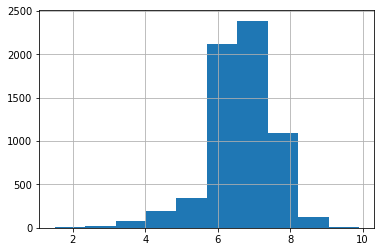

In [51]:
totalx['MovieImdbRating'].hist()

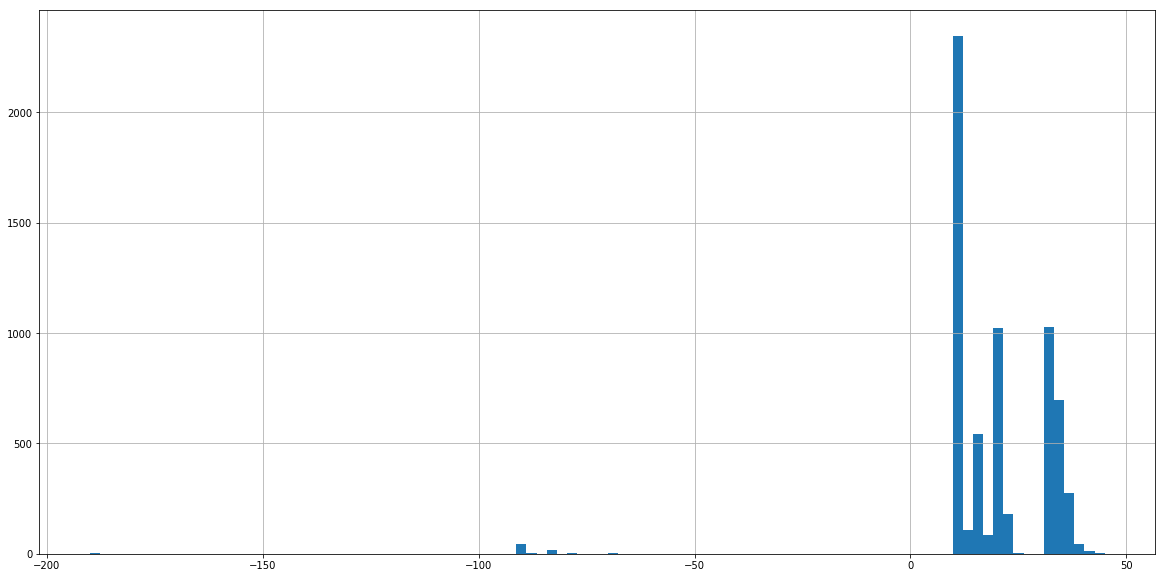

In [52]:
totalx['Score'].hist(figsize=(20,10),bins=100)

In [53]:
totalx[totalx['Score'] <0]

IDMovieImdb IDSubtitleFile  MovieImdbRating MovieKind  \
20029      5989218     1956155717              5.8     movie   
5271       1611211     1952746269              7.1     movie   
10642      2194497     1953355635              6.1     movie   
20193      6675244     1956120383              6.9     movie   
8846       1945034     1953629200              6.6     movie   
16448      3530882     1955419306              7.3     movie   
17972      4042814     1955606275              6.6     movie   
10230      2122518     1955030814              6.6     movie   
5105       1599296     1955901556              6.2     movie   
14883      3074780     1954611403              7.4     movie   
12962      2524674     1954495548              NaN     movie   
1351       1072754     1952262649              5.0     movie   
12060      2369047     1953810414              7.3     movie   
19118      4539336     1954775089              5.2     movie   
18102      4082068     1955051208              7.2     movie   
9853       2083231     1953412931              5.2     movie   
14362      2929652     1955266874              5.6     movie   
14420      2947556     1954911201              3.6     movie   
2651       1308729     1953594396              5.7     movie   
15154      3150966     1955853324              5.3     movie   
12877      2494834     1955665141              6.1     movie   
15084      3131210     1954854633              6.9     movie   
6971       1754104     1955158704              6.3     movie   
17750      3919644     1954951842              6.2     movie   
19478      4675926     1956006165              7.0     movie   
19610      4715356     1955614340              5.6     movie   
2225       1247400     1954494272              2.9     movie   
2697       1318517     1956217516              6.5     movie   
10792      2215673     1954903062              5.1     movie   
13230      2578608     1955096148              1.7     movie   
...            ...            ...              ...       ...   
20464      7638344     1956176500              4.4     movie   
1316       1059836     1953223016              5.8     movie   
19558      4700248     1955887242              7.6     movie   
19850      5459382     1956116660              7.5     movie   
17878      4000670     1955554119              7.5     movie   
18653      4291066     1955601822              7.9     movie   
18079      4078744     1955242377              7.7     movie   
11636      2318601     1955119807              6.2     movie   
13630      2711672     1955048192              6.4     movie   
17157      3752930     1954738708              7.6     movie   
9851       2082496     1954997960              7.2     movie   
11059      2258465     1954799534              7.1     movie   
13958      2827320     1955972373              8.2     movie   
15092      3135424     1955706925              6.1     movie   
13179      2562234     1954174133              6.6     movie   
11357      2292676     1954944462              6.7     movie   
19999      5894778     1955894808              7.1     movie   
14786      3057572     1956054176              7.0     movie   
18867      4419390     1955257850              6.7     movie   
20334      7046974     1956229132              7.9     movie   
4857       1583356     1955739347              6.3     movie   
16616      3584954     1956136923              7.0     movie   
20053      6109168     1956200878              7.3     movie   
8010       1845846     1956191952              6.5     movie   
20658      8666494     1956156503              7.2     movie   
19361      4632440     1955481579              6.6     movie   
2023       1225856     1955941250              6.6     movie   
11524      2310792     1955129660              6.7     movie   
10663      2196017     1954688838              6.8     movie   
20585      8098546     1956049401              6.7     movie   

                                      

In [54]:
colunas = [x for x in totalx.columns if x.startswith('word_')]
colunas

['word_AAAA',
 'word_PENOLOGY',
 'word_PENSABA',
 'word_PENSA',
 'word_PENS',
 'word_PENRY',
 'word_PENROSES',
 'word_PENROSE',
 'word_PENPUSHERS',
 'word_PENPUSHER',
 'word_PENPAL',
 'word_PENOTTI',
 'word_PENON',
 'word_PENOLETNIA',
 'word_PENSADA',
 'word_PENO',
 'word_PENNZOIL',
 'word_PENNYWORTH',
 'word_PENNYWISES',
 'word_PENNYWISEL',
 'word_PENNYWISED',
 'word_PENNYWISE',
 'word_PENNYWINCKLE',
 'word_PENNYWEIGHT',
 'word_PENNYWAYS',
 'word_PENNYVILLE',
 'word_PENSACOLA',
 'word_PENSADO',
 'word_PENSIERO',
 'word_PENSEE',
 'word_PENSI',
 'word_PENSEZVOUS',
 'word_PENSEZ',
 'word_PENSEUR',
 'word_PENSESTU',
 'word_PENSES',
 'word_PENSERAIS',
 'word_PENSER',
 'word_PENSENT',
 'word_PENSEI',
 'word_PENSEES',
 'word_PENSEC',
 'word_PENSAIS',
 'word_PENSE',
 'word_PENSATRO',
 'word_PENSATO',
 'word_PENSATION',
 'word_PENSARLO',
 'word_PENSARA',
 'word_PENSAR',
 'word_PENSANDO',
 'word_PENSAMOS',
 'word_PENSAMENTOS',
 'word_PENSAIT',
 'word_PENNYSAVER',
 'word_PENNYS',
 'word_PENNYPIN

In [55]:
colunas_10 = [x for x in colunas if sum(totalx[x]) >5]
for  x in colunas_10:
    print(x,sum(totalx[x]))

word_AAAA 177
word_PENSA 472
word_PENS 5337
word_PENO 28
word_PENSACOLA 13
word_PENSI 1688
word_PENSES 413
word_PENSER 17
word_PENSE 831
word_PENSATION 230
word_PENSAR 20
word_PENNYS 12
word_PENNEY 8
word_PENNING 10
word_PENNILESS 76
word_PENNIES 98
word_PENNI 193
word_PENNED 12
word_PENNE 60
word_PENNANT 9
word_PENNY 506
word_PENNSYLVANIA 121
word_PENNS 125
word_PENTUP 17
word_PENTS 30
word_PENULTIMATE 9
word_PENTING 14
word_PENTHOUSE 80
word_PENSIN 12
word_PENY 9
word_PENSIONS 69
word_PENSOU 6
word_PENSO 10
word_PENSIVE 1315
word_PENSIONERS 20
word_PENSIONER 33
word_PENSIONE 37
word_PENSION 460
word_PENT 2764
word_PENTECOSTAL 12
word_PENTECOST 15
word_PENTAGRAM 10
word_PENTAGONS 6
word_PENTAGON 87
word_PENDLE 10
word_PENE 5831
word_PENDULUM 29
word_PENDS 1249
word_PENDLETON 8
word_PENED 5804
word_PENDING 1273
word_PENDERS 21
word_PENDER 45
word_PENETRATIVE 8
word_PENETRATION 63
word_PENETRATING 31
word_PENETRATES 21
word_PENETRATED 58
word_PENETRATE 176
word_PENETRABLE 45
word_PENES 

word_PARCE 141
word_PARASITES 73
word_PARASITE 151
word_PARAS 215
word_PARAR 6
word_PARAPSYCHOLOGY 7
word_PARAPSYCHOLOGIST 6
word_PARASOL 18
word_PARASO 24
word_PARASITIC 18
word_PARRY 19
word_PARROTS 31
word_PARROTING 6
word_PARROT 132
word_PARRISH 9
word_PARRIS 12
word_PARRING 50
word_PARSNIP 11
word_PARSLEY 32
word_PARSI 14
word_PARS 144
word_PARSE 38
word_PAROV 9
word_PAROTTA 11
word_PAROT 18
word_PAROLEE 12
word_PAROLED 20
word_PAROLE 204
word_PAROL 205
word_PAROISSIEN 12
word_PARRED 6
word_PARRA 11
word_PARR 345
word_PARQUET 7
word_PARQUE 12
word_PARTICIPATED 98
word_PARTICIPATE 403
word_PARTICIPANTS 82
word_PARTICIPANT 118
word_PARTIALLY 87
word_PARTIALITY 8
word_PARTIAL 231
word_PARTI 2572
word_PARTHENON 6
word_PARTICIPATES 14
word_PARTICULAR 1311
word_PARTICIPATING 116
word_PARTICLES 83
word_PARTICLE 120
word_PARTICIPATION 110
word_PARTHE 24
word_PARTAKING 6
word_PARTAKIN 6
word_PARTAKE 48
word_PARTA 127
word_PART 5933
word_PARSONS 24
word_PARSON 38
word_PARTH 35
word_PARTER 8

word_PASTURE 102
word_PASTS 22
word_PATCHING 33
word_PATHAN 14
word_PATHET 887
word_PATHE 893
word_PATHETICALLY 15
word_PATH 2842
word_PATES 32
word_PATHETIC 885
word_PATHOGEN 20
word_PATHIS 27
word_PATHIC 96
word_PATHI 324
word_PATHFINDERS 6
word_PATHFINDER 12
word_PATHFIND 13
word_PATERNITY 41
word_PATELLA 6
word_PATEL 39
word_PATEK 6
word_PATED 286
word_PATE 927
word_PATCHY 6
word_PATCHWORK 12
word_PATCHOULI 18
word_PATCHO 20
word_PATERNAL 37
word_PATERN 83
word_PATER 95
word_PATENTS 27
word_PATENTLY 12
word_PATENTING 6
word_PATENTED 29
word_PATENT 113
word_PASTIS 12
word_PASSES 615
word_PASSERSBY 19
word_PASSERS 37
word_PASSERBY 26
word_PASSER 80
word_PASSIONATELY 68
word_PASSIONATE 492
word_PASSION 1345
word_PASSING 1189
word_PASSIN 1198
word_PASSED 2311
word_PASSE 2943
word_PASSCODE 20
word_PASSBOOK 8
word_PASSB 8
word_PASSENGERS 293
word_PASSENGER 436
word_PASSENG 436
word_PASSEN 438
word_PASSIONE 16
word_PASTELS 8
word_PASTEL 21
word_PASTED 20
word_PASTE 281
word_PASTAS 9
word_

word_PICKMEUP 17
word_PICKME 19
word_PICKLES 99
word_PICKLED 61
word_PICKLE 270
word_PICKINGS 16
word_PICH 29
word_PICES 78
word_PICE 337
word_PICCOLO 7
word_PICCOLI 6
word_PICCHU 12
word_PICCADILLY 15
word_PICKED 1724
word_PICKAXE 16
word_PICKAX 21
word_PICK 4681
word_PICI 953
word_PIGN 11
word_PIGMENTS 8
word_PIGMENT 28
word_PIGLETS 16
word_PIGLET 41
word_PIGS 512
word_PIGPEN 10
word_PIGOT 14
word_PIGL 50
word_PIGGIES 18
word_PIGGIE 22
word_PIGEONS 111
word_PIGEONHOLE 12
word_PIGGING 9
word_PIGHEADED 23
word_PIGHEAD 27
word_PIGHE 27
word_PIGGYBACKING 8
word_PIGGYBACK 48
word_PIGGY 163
word_PIKED 42
word_PIKE 277
word_PIKA 28
word_PIKER 10
word_PIKING 17
word_PIKIN 19
word_PIKI 22
word_PIKEY 10
word_PIKES 67
word_PIGTAILS 15
word_PIGTAIL 18
word_PIGSTY 42
word_PIII 12
word_PIIED 9
word_PIIE 15
word_PIERCED 91
word_PIERCINGS 20
word_PIERCING 112
word_PIERCES 23
word_PIERCE 214
word_PIER 1141
word_PIERRE 180
word_PIERO 20
word_PIEHOLE 10
word_PIENTY 9
word_PIETY 29
word_PIETRO 17
word_P

word_OLINS 51
word_OLINES 76
word_OLINE 330
word_OLINA 167
word_OLIVE 328
word_OLIVIER 39
word_OLIVIE 40
word_OLIVIAS 13
word_OLIVIA 127
word_OLIVES 81
word_OLIVERS 15
word_OLIVER 100
word_OLIN 1384
word_OLIDAYS 403
word_OLIDAY 985
word_OLHOU 16
word_OLIE 108
word_OLIM 11
word_OLIGARCHS 13
word_OLIGARCH 23
word_OLIF 79
word_OLMAS 9
word_OLMS 21
word_OLONG 114
word_OLONE 343
word_OLOL 11
word_OLOK 15
word_OLOIN 6
word_OLOF 28
word_OLMAN 16
word_OLLI 1645
word_OLLEY 153
word_OLLET 14
word_OLLERS 103
word_OLLER 504
word_OLLAR 1710
word_OLLA 2532
word_OLLIE 127
word_OLLIER 16
word_OLLIES 54
word_OLLIN 1309
word_OLLYS 60
word_OLLY 1024
word_OLLOWS 350
word_OLLOWED 1246
word_OLLOW 4514
word_OLLOCK 182
word_OLLO 4606
word_OLLL 6
word_OKOK 11
word_OKOH 30
word_OIDO 8
word_OIDIE 13
word_OIDES 8
word_OIDER 81
word_OIDE 304
word_OICES 1140
word_OICEMAIL 192
word_OICE 4507
word_OIDS 266
word_OIIS 22
word_OHTHATS 6
word_OHTHAT 10
word_OHUM 8
word_OHWHO 6
word_OHWE 10
word_OHTA 11
word_OISIN 9
word_

word_OBLIGATIONS 97
word_OBLIGATION 285
word_OBLIGATED 63
word_OBLIGATE 65
word_OBLIGA 355
word_OBLIG 569
word_OBLAST 22
word_OARS 313
word_OARING 305
word_OARI 312
word_OARE 74
word_OATES 18
word_OATMEAL 59
word_OATMAN 12
word_OATING 454
word_OATHS 36
word_OATHI 32
word_OATH 400
word_OATED 191
word_OASIS 53
word_OAST 1894
word_OALM 15
word_OALL 23
word_OAKWOOD 6
word_OAKS 70
word_OAKLEY 13
word_OAMS 58
word_OANA 70
word_OANT 8
word_OATS 936
word_OBEA 24
word_OBBY 905
word_OBBING 769
word_OBBA 7
word_OBEDIENCE 113
word_OBERG 10
word_OBER 1489
word_OBEN 14
word_OBEDIENT 138
word_OBELISK 8
word_OBEL 167
word_OBEDIENTLY 14
word_OBAYASHI 25
word_OAXACA 9
word_OAVE 25
word_OBAMA 160
word_OBAT 240
word_OBAS 26
word_OBAN 45
word_OBAMAS 27
word_OBOL 17
word_OCCULT 39
word_OCCU 1463
word_OCCIPITAL 8
word_OCCUP 744
word_OCCHI 64
word_OCCUPANCY 11
word_OCCUPI 387
word_OCCUR 843
word_OCCUPYING 56
word_OCCUPY 192
word_OCCUPIES 24
word_OCCUPIERS 6
word_OCCUPIER 11
word_OCCUPIED 361
word_OCCUPANT 38


word_OUTSI 4207
word_OUTSHINE 17
word_OUTSET 26
word_OUTPOSTS 9
word_OUTPOST 39
word_OUTPLAY 7
word_OUTRANK 15
word_OUTPERFORM 15
word_OUTPATIENT 16
word_OUTPOUR 18
word_OUTPOURING 18
word_OUTRAN 17
word_OUTRAGEOUSLY 13
word_OUTRAGEOUS 248
word_OUTRAGED 63
word_OUTRAGE 373
word_OUTRA 397
word_OUTR 571
word_OUTPUTS 6
word_OUTPUT 78
word_OUTSTRETCHED 18
word_OUTSTRETCH 18
word_OUTSTAY 7
word_OUTSTANDING 247
word_OUTSPOKEN 38
word_OUTSPOKE 39
word_OUTSOURCING 10
word_OUTSOURCED 7
word_OUTSOURCE 22
word_OUTTO 11
word_OUTTHINK 6
word_OUTTHE 29
word_OUTTHAT 14
word_OUTTAKES 6
word_OUTTAKE 8
word_OUTTA 777
word_OUTSO 37
word_OUTSIDERS 124
word_OUTSIDER 235
word_OUTSIDES 7
word_OUTSMARTED 13
word_OUTSMART 48
word_OUTSKIRTS 83
word_OUTSKIRT 85
word_OWEL 903
word_OWEN 125
word_PAKI 217
word_PAKKA 8
word_PAKISTANS 22
word_PAKISTANIS 16
word_PAKISTANI 81
word_PAKISTAN 202
word_PAKIS 208
word_PAKA 14
word_PAISLEY 8
word_PAISE 20
word_PAISA 28
word_PAJU 8
word_PAIS 67
word_PAIRS 280
word_PAIRING 97


word_OPONENTS 8
word_OPON 44
word_OPINION 1335
word_OPET 10
word_OPES 1060
word_OPHELIA 13
word_OPINE 11
word_OPIE 611
word_OPIATES 10
word_OPIATE 20
word_OPHTHALMOLOGIST 12
word_OPHTH 14
word_OPAT 394
word_OPPOSING 93
word_OPPOSITIONS 12
word_OPPOSITION 223
word_OPPOSITES 40
word_OPPOSITE 924
word_OPPOSIT 1097
word_OPPOSES 30
word_OPPOSED 320
word_OPPOSE 448
word_OPPOS 1435
word_OPPS 13
word_OPPRESSORS 25
word_OPPRESSOR 39
word_OPPRESSO 41
word_OPPRESSIVE 47
word_OPPRESSION 81
word_OPPRESSING 16
word_OPPRESSED 96
word_OPPRESS 255
word_OPPENHEIMER 9
word_OPPA 176
word_OPOSITION 145
word_OPPORTUNITY 1625
word_OPPORTUNITIES 320
word_OPPORTUNIT 1781
word_OPPORTUNISTS 7
word_OPPORTUNISTIC 13
word_OPPORTUNIST 36
word_OPPORTUNE 23
word_OPPORT 1826
word_OPPONENTS 148
word_OPPONENT 336
word_OPPO 2823
word_OPPING 2385
word_OPERETTA 8
word_OPENI 1309
word_OPENING 1294
word_OPENIN 1298
word_OPENHEARTED 6
word_OPENHEART 10
word_OPENERS 11
word_OPENER 83
word_OPENINGS 62
word_OPENNESS 27
word_OPENN

word_REEKS 159
word_REEKING 10
word_REEKED 11
word_REEK 666
word_REEI 235
word_REEHAN 6
word_RECORDS 959
word_REBUKE 23
word_REBUTTAL 13
word_REBUT 26
word_REBUILT 87
word_REBUILDING 68
word_RECALL 586
word_RECANT 19
word_RECALLS 21
word_RECALLING 24
word_RECALLED 48
word_RECA 1088
word_RECALIBRATE 12
word_RECALCULATING 10
word_RECALCU 15
word_REBUILDIN 68
word_REBUILDI 68
word_REBOUND 57
word_REBORN 124
word_REBOOTING 16
word_REBOOTIN 16
word_REBOOTED 10
word_REBOOT 76
word_REBOOK 8
word_REBOM 15
word_REBOARD 32
word_REBO 366
word_REBUILD 240
word_REBUFF 14
word_REBS 6
word_REBRO 17
word_REBRANDING 6
word_REBRAND 23
word_RECAP 85
word_RECEIVING 328
word_RECENTIY 10
word_RECENT 1715
word_RECEIVIN 329
word_RECEIVES 93
word_RECEIVERS 20
word_RECEIVER 83
word_RECENTLY 1264
word_RECEPTOR 25
word_RECEPTIVE 26
word_RECEPTIONS 15
word_RECEPTIONIST 107
word_RECEPTION 537
word_RECEPTACLE 9
word_RECEP 613
word_RECE 3747
word_RECCE 11
word_RECASTING 15
word_RECAST 152
word_RECAPTURED 10
word_RECA

word_RANDOMIZED 6
word_RANCOR 8
word_RANCO 148
word_RANCIS 427
word_RANCID 31
word_RANCI 504
word_RANCHS 7
word_RANDD 409
word_RANDOM 640
word_RANDOLPH 13
word_RANDO 751
word_RANDMA 1100
word_RANDIS 26
word_RANDIE 8
word_RANDI 158
word_RANDEL 11
word_RANGER 1376
word_RANKER 9
word_RANKED 100
word_RANKA 12
word_RANK 2694
word_RANKIN 173
word_RANJIT 14
word_RANJI 18
word_RANJHA 7
word_RANJAN 17
word_RANKI 287
word_RANNI 85
word_RANNA 9
word_RANN 535
word_RANMA 8
word_RANKS 378
word_RANKING 159
word_RANKO 14
word_RANKINGS 14
word_RANGLE 320
word_RANGOLI 7
word_RANGOI 7
word_RANGO 42
word_RANGING 130
word_RANGI 155
word_RANGES 234
word_RANGERS 694
word_RANIS 22
word_RANIN 13
word_RANIA 102
word_RANI 324
word_RANGU 48
word_RANCHO 12
word_RANO 642
word_RAMN 27
word_RAMMY 53
word_RAMMING 123
word_RAMMERS 23
word_RAMMER 53
word_RAMMED 189
word_RAMMA 156
word_RAML 16
word_RAMONS 7
word_RAMONES 19
word_RAMONE 26
word_RAMONA 15
word_RAMON 97
word_RAMO 238
word_RAMI 450
word_RAMESHWAR 9
word_RAMIE

word_RAZA 47
word_RAYS 495
word_RAYA 330
word_RAWS 235
word_RAWR 9
word_RAWNESS 6
word_RAWLY 6
word_RAWLS 59
word_RAWLINGS 6
word_RAWLEY 10
word_RAWLE 188
word_RAWING 817
word_RAWHIDE 8
word_RAYING 687
word_RAYI 701
word_RAYE 1659
word_RAYBAN 8
word_RAYAN 63
word_REMUNERATION 25
word_RITISH 579
word_RITON 53
word_RITHA 8
word_RITES 715
word_RITTER 122
word_RITUALI 89
word_RITUAL 733
word_RITUA 738
word_RITU 776
word_RITTERS 78
word_RITTEN 1837
word_RITS 700
word_RITE 4476
word_RISQUE 11
word_RISQU 21
word_RISOTTO 39
word_RITCHIE 19
word_RISO 2203
word_RISN 14
word_RISKY 366
word_RISSE 28
word_RITCHI 20
word_RITCHE 27
word_RITAS 72
word_RITALIN 22
word_RITA 1341
word_RISTOPH 165
word_RISTO 369
word_RISTEN 116
word_RIST 3992
word_RISSO 21
word_RIVERS 777
word_RIVERDALE 6
word_RIVERSIDE 41
word_RITUALISTIC 17
word_RIVIERA 22
word_RIVIER 27
word_RIVETING 20
word_RIVETED 6
word_RIVET 62
word_RIVES 945
word_RIVAL 671
word_RIVAI 7
word_RIVA 2566
word_RITZY 7
word_RITZCARLTON 8
word_RIVERBED 1

word_ROILING 6
word_ROIL 59
word_ROIIING 6
word_ROIIIN 7
word_ROJI 11
word_ROJO 7
word_ROKER 192
word_ROLAN 62
word_ROKUS 6
word_ROKU 26
word_ROKO 17
word_ROKI 61
word_RODA 30
word_ROCS 20
word_ROCO 207
word_ROCKYS 8
word_RODEO 82
word_RODENTS 25
word_RODENT 58
word_RODEN 64
word_RODE 508
word_RODDY 10
word_RODDING 12
word_ROCKY 182
word_ROCKS 739
word_ROCKPAPERSCISSOR 7
word_ROCKO 9
word_ROCKNROLL 35
word_ROCKWELL 11
word_ROCKSTARS 6
word_ROCKSTAR 29
word_ROCKSOLID 7
word_RODS 87
word_RODRIGUEZ 56
word_RODRIGUES 9
word_RODRIGUE 68
word_RODRIGO 37
word_ROEBUCK 6
word_ROEDER 8
word_RODRI 110
word_RODI 268
word_RODGERS 15
word_RODGER 18
word_RODGE 19
word_RODERICK 13
word_RODOLFO 10
word_RODOLF 11
word_RODO 53
word_RODNEYS 6
word_RODNEY 50
word_RODIN 33
word_RIDICUL 1662
word_RIDICUIOUS 8
word_RESEARCHERS 67
word_RESEARCHING 113
word_RESEARCHIN 113
word_RESEARCHES 13
word_RESEARCHER 113
word_RESEARCHED 66
word_RESEARCH 1057
word_RESENTED 543
word_RESENTATION 436
word_RESENT 3455
word_RES

word_RIDDLER 7
word_RIDDLED 42
word_RIDDLE 186
word_RIDDING 17
word_RIDDEN 151
word_RICHEST 128
word_RICHES 242
word_RIANAS 16
word_RIBAB 51
word_RIBA 200
word_RIAS 167
word_RIANT 38
word_RIANS 359
word_RIANA 67
word_RIAN 1871
word_RIALS 497
word_RIALL 17
word_RIAL 2484
word_RIAA 6
word_RIBBON 170
word_RIBBLE 132
word_RIBAL 117
word_RIBBIT 6
word_RIBBING 13
word_RIBBENTROP 7
word_RIBBED 15
word_RIBALD 13
word_RHYME 230
word_RHUS 11
word_RHUM 52
word_RHYTHMS 43
word_RHUBARB 27
word_RHYMED 15
word_RHYTHMICALLY 37
word_RHYTHMICAL 40
word_RHYTHMIC 121
word_RHYTHMI 139
word_RHYTHM 541
word_RHYMING 34
word_RHYMIN 35
word_RHYMES 105
word_RIBBONS 53
word_RICEY 32
word_RICES 351
word_RICER 14
word_RICH 2620
word_RICHA 519
word_RICHAR 502
word_RICHER 147
word_RICHE 412
word_RICHARDSON 28
word_RICHARDS 128
word_RICHARD 502
word_RIBCAGE 6
word_RIBS 228
word_RIBO 38
word_RICE 2533
word_RIBES 318
word_RIBERY 60
word_RICA 3984
word_RICAB 17
word_RICCI 10
word_RICCA 7
word_RICAS 1061
word_RICARDOS 8
w

word_PROMOTERS 41
word_PROMPT 196
word_PROMOTIONS 38
word_PROMOTIONAL 35
word_PROMOTION 430
word_PROMOTING 127
word_PROMOTIN 128
word_PROMOTES 33
word_PROMOTER 87
word_PROMOTED 293
word_PROMOTE 570
word_PROMOS 15
word_PROMPTED 46
word_PROMPTER 17
word_PROMPTI 14
word_PROMS 11
word_PROMPTLY 69
word_PROMPTING 11
word_PROOFI 13
word_PROPENSITY 9
word_PROPERIY 7
word_PROPER 2701
word_PROPELLERS 14
word_PROPELLER 36
word_PROPELLED 25
word_PROPELLANT 9
word_PROPERLY 1178
word_PROOFING 13
word_PROPERTY 1097
word_PROPERTIES 170
word_PROPERT 1203
word_PROPEL 89
word_PROOFS 37
word_PROOFREADING 11
word_PROOFREADER 9
word_PROOFREAD 41
word_PROP 3958
word_PROPE 2757
word_PROPANE 15
word_PROPAGATION 7
word_PROPAGATING 9
word_PROPAGATED 7
word_PROPAGATE 21
word_PROPAGANDIST 9
word_PROPAGANDA 169
word_PROLAPSE 6
word_PROLE 54
word_PROLETARIAN 20
word_PROLETARIANS 8
word_PROLONGED 57
word_PROLIFIC 31
word_PROLONG 97
word_PROLOGUE 22
word_PROLOG 22
word_PROLETARIAT 29
word_PROLIFERATION 18
word_PROLIFE

word_POSEIDONS 6
word_POSEIDON 14
word_POSEDLY 257
word_POSED 4282
word_POSE 5223
word_POSER 141
word_POSERS 42
word_POSES 399
word_PREARRANGED 7
word_PRECEDED 18
word_PRECAUTIONS 91
word_PRECAUTIONARY 23
word_PRECAUTION 207
word_PRECARIOUS 46
word_PREAPPROVED 8
word_PREA 1866
word_PREAMBLE 9
word_PREADS 168
word_PREACHY 6
word_PREACHING 116
word_PREACHIN 117
word_PREACHES 19
word_PREACHERS 33
word_PREACHER 121
word_PREACHED 30
word_PREACH 319
word_PRECEDE 313
word_PRECEDENCE 23
word_PRECIS 741
word_PRECISE 659
word_PRECIPITATION 10
word_PRECIPITATED 6
word_PRECISELY 408
word_PRECLUDE 13
word_PRECISION 100
word_PRECIPITATE 11
word_PRECIPIT 30
word_PRECEPT 16
word_PRECEPTS 9
word_PRECEDING 19
word_PRECEDES 37
word_PRECEDENTS 6
word_PRECEDENT 242
word_PRECIATE 1981
word_PRECIPICE 20
word_PRECIOUS 869
word_PRECIO 871
word_PRECINCTS 12
word_PRECINCT 99
word_PRATE 16
word_PRATAP 23
word_PRATA 25
word_PRAT 123
word_PRATI 17
word_PRANKSTERS 14
word_PRANKSTER 37
word_PRANKS 93
word_PRANKED 8
w

In [56]:
len(colunas_10)

10638

In [62]:
totalx[colunas].dtypes

word_AAAA                                      int64
word_PENOLOGY                                  int64
word_PENSABA                                   int64
word_PENSA                                     int64
word_PENS                                      int64
word_PENRY                                     int64
word_PENROSES                                  int64
word_PENROSE                                   int64
word_PENPUSHERS                                int64
word_PENPUSHER                                 int64
word_PENPAL                                    int64
word_PENOTTI                                   int64
word_PENON                                     int64
word_PENOLETNIA                                int64
word_PENSADA                                   int64
word_PENO                                      int64
word_PENNZOIL                                  int64
word_PENNYWORTH                                int64
word_PENNYWISES                               

In [118]:
t = totalx[:20]

In [120]:
t[colunas_10]

word_AAAA  word_PENSA  word_PENS  word_PENO  word_PENSACOLA  \
7744           0           0          1          0               0   
3998           0           0          1          0               0   
16395          0           0          0          0               0   
18250          0           0          0          0               0   
16644          0           0          1          0               0   
19730          0           1          1          0               0   
19853          0           0          1          0               0   
10882          0           0          1          0               0   
12529          0           0          1          0               0   
16311          0           0          1          0               0   
2995           0           0          1          0               0   
17127          0           1          1          0               0   
19652          0           0          1          0               0   
3579           0           0          1          0               0   
2341           0           0          1          0               0   
10190          0           0          1          0               0   
738            0           0          1          0               0   
15666          0           0          1          0               0   
1834           0           0          1          0               0   
249            0           0          1          0               0   

       word_PENSI  word_PENSES  word_PENSER  word_PENSE  word_PENSATION  \
7744            0            0            0           0               0   
3998            0            0            0           0               0   
16395           0            0            0           0               0   
18250           0            0            0           0               0   
16644           0            0            0           0               0   
19730           1            0            0           0               1   
19853           0            0            1           1               0   
10882           0            0            0           0               0   
12529           0            0            0           0               0   
16311           0            0            0           0               0   
2995            0            0            0           0               0   
17127           0            0            0           0               0   
19652           0            0            0           0               0   
3579            0            0            0           0               0   
2341            0            0            0           0               0   
10190           0            0            0           0               0   
738             0            0            0           1               0   
15666           1            0            0           0               0   
1834            1            0            0           0               0   
249             1            0            0           0               0   

           ...        word_QUARTERFINALS  word_QUARTERFINAL  word_QUARTERED  \
7744       ...                     False              False           False   
3998       ...                     False              False           False   
16395      ...                     False              False           False   
18250      ...                     False              False           False   
16644      ...                     False              False           False   
19730      ...                     False              False           False   
19853      ...                     False              False           False   
10882      ...                     False              False           False   
12529      ...                     False              False           False   
16311      ...                     False              False           False   
2995       ...                     False              False           False   
17127      .

In [110]:
t = t[colunas_10[:29]]

In [132]:
from random import shuffle

In [133]:
colunas_10

['word_AAAA',
 'word_PENSA',
 'word_PENS',
 'word_PENO',
 'word_PENSACOLA',
 'word_PENSI',
 'word_PENSES',
 'word_PENSER',
 'word_PENSE',
 'word_PENSATION',
 'word_PENSAR',
 'word_PENNYS',
 'word_PENNEY',
 'word_PENNING',
 'word_PENNILESS',
 'word_PENNIES',
 'word_PENNI',
 'word_PENNED',
 'word_PENNE',
 'word_PENNANT',
 'word_PENNY',
 'word_PENNSYLVANIA',
 'word_PENNS',
 'word_PENTUP',
 'word_PENTS',
 'word_PENULTIMATE',
 'word_PENTING',
 'word_PENTHOUSE',
 'word_PENSIN',
 'word_PENY',
 'word_PENSIONS',
 'word_PENSOU',
 'word_PENSO',
 'word_PENSIVE',
 'word_PENSIONERS',
 'word_PENSIONER',
 'word_PENSIONE',
 'word_PENSION',
 'word_PENT',
 'word_PENTECOSTAL',
 'word_PENTECOST',
 'word_PENTAGRAM',
 'word_PENTAGONS',
 'word_PENTAGON',
 'word_PENDLE',
 'word_PENE',
 'word_PENDULUM',
 'word_PENDS',
 'word_PENDLETON',
 'word_PENED',
 'word_PENDING',
 'word_PENDERS',
 'word_PENDER',
 'word_PENETRATIVE',
 'word_PENETRATION',
 'word_PENETRATING',
 'word_PENETRATES',
 'word_PENETRATED',
 'word_PE

In [135]:
shuffle(colunas_10)
colunas_10

['word_ROLLERS',
 'word_POSU',
 'word_PLANNERS',
 'word_PERSONI',
 'word_PARAPLEGIC',
 'word_RASHNESS',
 'word_OFSHIT',
 'word_PLASTICS',
 'word_OKANE',
 'word_RAGS',
 'word_OLLIES',
 'word_OMELETTE',
 'word_PLOWING',
 'word_REACTI',
 'word_PRAYIN',
 'word_ROINE',
 'word_RECOGNI',
 'word_PACEY',
 'word_OLCHILDREN',
 'word_REDECORATING',
 'word_OHNO',
 'word_RINCH',
 'word_RENATA',
 'word_OUTPOST',
 'word_RODNEYS',
 'word_PANDYA',
 'word_PALAM',
 'word_PETERSBURG',
 'word_PLATS',
 'word_RAINIE',
 'word_OVERTLY',
 'word_POPS',
 'word_ORDS',
 'word_PAULA',
 'word_OSSA',
 'word_REJOICED',
 'word_PARTTIM',
 'word_OBAMAS',
 'word_PAES',
 'word_PAINING',
 'word_OUTGUNNED',
 'word_REKINDLED',
 'word_RESPONDENTS',
 'word_PATCHOULI',
 'word_ROMANTICIZE',
 'word_OWNIT',
 'word_REIATIONSHIP',
 'word_RIPPERS',
 'word_PIROGUE',
 'word_REINSTATE',
 'word_ROBBED',
 'word_PITS',
 'word_RAREST',
 'word_PLEATED',
 'word_RAUM',
 'word_PRISONED',
 'word_PROBLEMATIC',
 'word_REFRIED',
 'word_PILGRIMS',
 'wo

In [139]:
totalx['total'] = totalx[colunas_10].apply(lambda x: ''.join((x*1).map(str)), axis=1)

In [140]:
totalx['total']

7744     0000000000000000000000000000000000000000000000...
3998     0000000000000000100000000000000110000000000000...
16395    0000000000000000000000000000000010000000000000...
18250    0000000000000000000000000000000010000000000000...
16644    0000000000000100100000000000000010001000000000...
19730    0000000000000000100000000000000110000000000000...
19853    0000000000000000000000000000000010000000000000...
10882    0000000000000100100000000000000010000000000000...
12529    0000000000000000000000000000000010000000000000...
16311    0000000000000000100100000000000010000000000000...
2995     0000000000000000000000000000000000000000000000...
17127    0000000000000110000000000000000010000000000000...
19652    0100000000000100000000000000000010000000000000...
3579     0000000000000000000000000000000010100000000000...
2341     0000000000000100000000000000000010000000000000...
10190    0000000000000010100000000000000010000000000000...
738      0100000000000000100000000000000010000000100000.

In [150]:
genres = list(set(','.join(list(totalx.genres.unique())).split(',')))
genres

['War',
 'History',
 'Crime',
 'Family',
 'Western',
 'Comedy',
 'Romance',
 'News',
 '\\N',
 'Sport',
 'Action',
 'Thriller',
 'Drama',
 'Sci-Fi',
 'Animation',
 'Fantasy',
 'Musical',
 'Documentary',
 'Adventure',
 'Music',
 'Horror',
 'Mystery',
 'Biography']

In [153]:
df_genre = totalx
for g in genres:
    df_genre['genre_'+str(g)] = df_genre.genres.apply(lambda x: (g in x.split(',')))
df_genre

IDMovieImdb IDSubtitleFile  MovieImdbRating MovieKind  \
7744       1825683     1955925593              7.4     movie   
3998       1477834     1956161159              7.3     movie   
16395      3521164     1955468734              7.6     movie   
18250      4154756     1955922357              8.5     movie   
16644      3606756     1956004027              7.9     movie   
19730      5095030     1955990341              7.1     movie   
19853      5463162     1956020213              7.8     movie   
10882      2231461     1955970210              6.1     movie   
12529      2404435     1955396985              6.9     movie   
16311      3501632     1955814417              7.9     movie   
2995       1365519     1955954121              6.3     movie   
17127      3748528     1955500534              7.8     movie   
19652      4912910     1956054437              7.8     movie   
3579       1431045     1955186249              8.0     movie   
2341       1270797     1956112731              6.8     movie   
10190      2119532     1955458877              8.1     movie   
738         848228     1953189057              8.1     movie   
15666      3315342     1955569426              8.1     movie   
1834       1211837     1955466753              7.5     movie   
249         455944     1954505115              7.2     movie   
1993       1219827     1955548815              6.4     movie   
9165       1981115     1954116988              7.0     movie   
11278      2283362     1955860976              7.0     movie   
2278       1259528     1955904878              7.0     movie   
17450      3829266     1956112383              5.4     movie   
16798      3659388     1955024019              8.0     movie   
14886      3076658     1955082364              7.6     movie   
3215       1392190     1954851014              8.1     movie   
18524      4244998     1956097779              6.7     movie   
17671      3896198     1955642073              7.7     movie   
...            ...            ...              ...       ...   
20464      7638344     1956176500              4.4     movie   
1316       1059836     1953223016              5.8     movie   
19558      4700248     1955887242              7.6     movie   
19850      5459382     1956116660              7.5     movie   
17878      4000670     1955554119              7.5     movie   
18653      4291066     1955601822              7.9     movie   
18079      4078744     1955242377              7.7     movie   
11636      2318601     1955119807              6.2     movie   
13630      2711672     1955048192              6.4     movie   
17157      3752930     1954738708              7.6     movie   
9851       2082496     1954997960              7.2     movie   
11059      2258465     1954799534              7.1     movie   
13958      2827320     1955972373              8.2     movie   
15092      3135424     1955706925              6.1     movie   
13179      2562234     1954174133              6.6     movie   
11357      2292676     1954944462              6.7     movie   
19999      5894778     1955894808              7.1     movie   
14786      3057572     1956054176              7.0     movie   
18867      4419390     1955257850              6.7     movie   
20334      7046974     1956229132              7.9     movie   
4857       1583356     1955739347              6.3     movie   
16616      3584954     1956136923              7.0     movie   
20053      6109168     1956200878              7.3     movie   
8010       1845846     1956191952              6.5     movie   
20658      8666494     1956156503              7.2     movie   
19361      4632440     1955481579              6.6     movie   
2023       1225856     1955941250              6.6     movie   
11524      2310792     1955129660              6.7     movie   
10663      2196017     1954688838              6.8     movie   
20585      8098546     1956049401              6.7     movie   

                                      

In [152]:
totalx

IDMovieImdb IDSubtitleFile  MovieImdbRating MovieKind  \
7744       1825683     1955925593              7.4     movie   
3998       1477834     1956161159              7.3     movie   
16395      3521164     1955468734              7.6     movie   
18250      4154756     1955922357              8.5     movie   
16644      3606756     1956004027              7.9     movie   
19730      5095030     1955990341              7.1     movie   
19853      5463162     1956020213              7.8     movie   
10882      2231461     1955970210              6.1     movie   
12529      2404435     1955396985              6.9     movie   
16311      3501632     1955814417              7.9     movie   
2995       1365519     1955954121              6.3     movie   
17127      3748528     1955500534              7.8     movie   
19652      4912910     1956054437              7.8     movie   
3579       1431045     1955186249              8.0     movie   
2341       1270797     1956112731              6.8     movie   
10190      2119532     1955458877              8.1     movie   
738         848228     1953189057              8.1     movie   
15666      3315342     1955569426              8.1     movie   
1834       1211837     1955466753              7.5     movie   
249         455944     1954505115              7.2     movie   
1993       1219827     1955548815              6.4     movie   
9165       1981115     1954116988              7.0     movie   
11278      2283362     1955860976              7.0     movie   
2278       1259528     1955904878              7.0     movie   
17450      3829266     1956112383              5.4     movie   
16798      3659388     1955024019              8.0     movie   
14886      3076658     1955082364              7.6     movie   
3215       1392190     1954851014              8.1     movie   
18524      4244998     1956097779              6.7     movie   
17671      3896198     1955642073              7.7     movie   
...            ...            ...              ...       ...   
20464      7638344     1956176500              4.4     movie   
1316       1059836     1953223016              5.8     movie   
19558      4700248     1955887242              7.6     movie   
19850      5459382     1956116660              7.5     movie   
17878      4000670     1955554119              7.5     movie   
18653      4291066     1955601822              7.9     movie   
18079      4078744     1955242377              7.7     movie   
11636      2318601     1955119807              6.2     movie   
13630      2711672     1955048192              6.4     movie   
17157      3752930     1954738708              7.6     movie   
9851       2082496     1954997960              7.2     movie   
11059      2258465     1954799534              7.1     movie   
13958      2827320     1955972373              8.2     movie   
15092      3135424     1955706925              6.1     movie   
13179      2562234     1954174133              6.6     movie   
11357      2292676     1954944462              6.7     movie   
19999      5894778     1955894808              7.1     movie   
14786      3057572     1956054176              7.0     movie   
18867      4419390     1955257850              6.7     movie   
20334      7046974     1956229132              7.9     movie   
4857       1583356     1955739347              6.3     movie   
16616      3584954     1956136923              7.0     movie   
20053      6109168     1956200878              7.3     movie   
8010       1845846     1956191952              6.5     movie   
20658      8666494     1956156503              7.2     movie   
19361      4632440     1955481579              6.6     movie   
2023       1225856     1955941250              6.6     movie   
11524      2310792     1955129660              6.7     movie   
10663      2196017     1954688838              6.8     movie   
20585      8098546     1956049401              6.7     movie   

                                      

In [154]:
df_genre['output'] = df_genre[['genre_'+str(g) for g in genres]].apply(lambda x: ''.join((x*1).map(str)), axis=1)

In [177]:
most_genre = [x for x in df_genre.columns if x.startswith('genre_') and sum(df_genre[x]) > 700]
df_genre['output_most'] = df_genre[most_genre].apply(lambda x: ''.join((x*1).map(str)), axis=1)

In [182]:
most_genre

['genre_Crime',
 'genre_Comedy',
 'genre_Romance',
 'genre_Action',
 'genre_Thriller',
 'genre_Drama']

In [183]:
df_genre.output_most

7744     000100
3998     000100
16395    010000
18250    000100
16644    000100
19730    010100
19853    010100
10882    000100
12529    000100
16311    010100
2995     000100
17127    000100
19652    000110
3579     010100
2341     000110
10190    000001
738      000100
15666    000101
1834     000100
249      100110
1993     000101
9165     000100
11278    010100
2278     100101
17450    000100
16798    000001
14886    000001
3215     000100
18524    000001
17671    010100
          ...  
20464    011001
1316     100110
19558    000001
19850    000001
17878    000000
18653    000000
18079    000000
11636    010001
13630    011001
17157    000001
9851     000001
11059    010001
13958    000001
15092    000000
13179    010100
11357    100001
19999    000001
14786    000001
18867    011001
20334    000001
4857     000101
16616    010001
20053    000000
8010     000011
20658    000000
19361    000001
2023     000011
11524    000001
10663    000001
20585    010000
Name: output_most, Lengt

In [186]:
col_util = list(df_genre.columns)
col_util[-5:]

['genre_Horror', 'genre_Mystery', 'genre_Biography', 'output', 'output_most']

In [187]:
col_util = [x for x in col_util if not x.startswith('word_')]
col_util = [x for x in col_util if not x.startswith('genre_')]
df_consolidaded = df_genre[col_util]
df_consolidaded

IDMovieImdb IDSubtitleFile  MovieImdbRating MovieKind  \
7744       1825683     1955925593              7.4     movie   
3998       1477834     1956161159              7.3     movie   
16395      3521164     1955468734              7.6     movie   
18250      4154756     1955922357              8.5     movie   
16644      3606756     1956004027              7.9     movie   
19730      5095030     1955990341              7.1     movie   
19853      5463162     1956020213              7.8     movie   
10882      2231461     1955970210              6.1     movie   
12529      2404435     1955396985              6.9     movie   
16311      3501632     1955814417              7.9     movie   
2995       1365519     1955954121              6.3     movie   
17127      3748528     1955500534              7.8     movie   
19652      4912910     1956054437              7.8     movie   
3579       1431045     1955186249              8.0     movie   
2341       1270797     1956112731              6.8     movie   
10190      2119532     1955458877              8.1     movie   
738         848228     1953189057              8.1     movie   
15666      3315342     1955569426              8.1     movie   
1834       1211837     1955466753              7.5     movie   
249         455944     1954505115              7.2     movie   
1993       1219827     1955548815              6.4     movie   
9165       1981115     1954116988              7.0     movie   
11278      2283362     1955860976              7.0     movie   
2278       1259528     1955904878              7.0     movie   
17450      3829266     1956112383              5.4     movie   
16798      3659388     1955024019              8.0     movie   
14886      3076658     1955082364              7.6     movie   
3215       1392190     1954851014              8.1     movie   
18524      4244998     1956097779              6.7     movie   
17671      3896198     1955642073              7.7     movie   
...            ...            ...              ...       ...   
20464      7638344     1956176500              4.4     movie   
1316       1059836     1953223016              5.8     movie   
19558      4700248     1955887242              7.6     movie   
19850      5459382     1956116660              7.5     movie   
17878      4000670     1955554119              7.5     movie   
18653      4291066     1955601822              7.9     movie   
18079      4078744     1955242377              7.7     movie   
11636      2318601     1955119807              6.2     movie   
13630      2711672     1955048192              6.4     movie   
17157      3752930     1954738708              7.6     movie   
9851       2082496     1954997960              7.2     movie   
11059      2258465     1954799534              7.1     movie   
13958      2827320     1955972373              8.2     movie   
15092      3135424     1955706925              6.1     movie   
13179      2562234     1954174133              6.6     movie   
11357      2292676     1954944462              6.7     movie   
19999      5894778     1955894808              7.1     movie   
14786      3057572     1956054176              7.0     movie   
18867      4419390     1955257850              6.7     movie   
20334      7046974     1956229132              7.9     movie   
4857       1583356     1955739347              6.3     movie   
16616      3584954     1956136923              7.0     movie   
20053      6109168     1956200878              7.3     movie   
8010       1845846     1956191952              6.5     movie   
20658      8666494     1956156503              7.2     movie   
19361      4632440     1955481579              6.6     movie   
2023       1225856     1955941250              6.6     movie   
11524      2310792     1955129660              6.7     movie   
10663      2196017     1954688838              6.8     movie   
20585      8098546     1956049401              6.7     movie   

                                      

In [188]:
out = list(df_consolidaded['output_most'])
for x in df_consolidaded['output_most'].unique():
    print(x, out.count(x))

000100 273
010000 509
010100 115
000110 114
000001 1607
000101 220
100110 64
100101 115
110100 46
000111 40
000000 776
110001 42
100001 186
000010 253
011001 229
100011 90
110000 47
010001 534
000011 267
001001 401
001101 12
011000 174
100010 59
100100 43
010110 10
001010 10
011100 6
100000 43
010101 16
110010 10
001011 14
001000 48
101001 14
111000 3
010010 18
010011 8
101000 1
001100 5
001110 2
101010 1
011010 1


In [191]:
list(df_consolidaded.columns)

['IDMovieImdb',
 'IDSubtitleFile',
 'MovieImdbRating',
 'MovieKind',
 'MovieName',
 'MovieYear',
 'Score',
 'SubAutoTranslation',
 'SubBad',
 'SubDownloadsCnt',
 'SubEncoding',
 'SubFeatured',
 'SubForeignPartsOnly',
 'SubFormat',
 'SubFromTrusted',
 'SubHearingImpaired',
 'titleType',
 'primaryTitle',
 'originalTitle',
 'isAdult',
 'startYear',
 'runtimeMinutes',
 'genres',
 'averageRating',
 'numVotes',
 'id',
 'content',
 'total',
 'output',
 'output_most']

In [195]:
df_last = df_consolidaded[['IDMovieImdb','IDSubtitleFile','MovieImdbRating','MovieName', 'MovieYear', 
                           'primaryTitle', 'total', 'output_most']]

In [196]:
df_last

IDMovieImdb IDSubtitleFile  MovieImdbRating  \
7744       1825683     1955925593              7.4   
3998       1477834     1956161159              7.3   
16395      3521164     1955468734              7.6   
18250      4154756     1955922357              8.5   
16644      3606756     1956004027              7.9   
19730      5095030     1955990341              7.1   
19853      5463162     1956020213              7.8   
10882      2231461     1955970210              6.1   
12529      2404435     1955396985              6.9   
16311      3501632     1955814417              7.9   
2995       1365519     1955954121              6.3   
17127      3748528     1955500534              7.8   
19652      4912910     1956054437              7.8   
3579       1431045     1955186249              8.0   
2341       1270797     1956112731              6.8   
10190      2119532     1955458877              8.1   
738         848228     1953189057              8.1   
15666      3315342     1955569426              8.1   
1834       1211837     1955466753              7.5   
249         455944     1954505115              7.2   
1993       1219827     1955548815              6.4   
9165       1981115     1954116988              7.0   
11278      2283362     1955860976              7.0   
2278       1259528     1955904878              7.0   
17450      3829266     1956112383              5.4   
16798      3659388     1955024019              8.0   
14886      3076658     1955082364              7.6   
3215       1392190     1954851014              8.1   
18524      4244998     1956097779              6.7   
17671      3896198     1955642073              7.7   
...            ...            ...              ...   
20464      7638344     1956176500              4.4   
1316       1059836     1953223016              5.8   
19558      4700248     1955887242              7.6   
19850      5459382     1956116660              7.5   
17878      4000670     1955554119              7.5   
18653      4291066     1955601822              7.9   
18079      4078744     1955242377              7.7   
11636      2318601     1955119807              6.2   
13630      2711672     1955048192              6.4   
17157      3752930     1954738708              7.6   
9851       2082496     1954997960              7.2   
11059      2258465     1954799534              7.1   
13958      2827320     1955972373              8.2   
15092      3135424     1955706925              6.1   
13179      2562234     1954174133              6.6   
11357      2292676     1954944462              6.7   
19999      5894778     1955894808              7.1   
14786      3057572     1956054176              7.0   
18867      4419390     1955257850              6.7   
20334      7046974     1956229132              7.9   
4857       1583356     1955739347              6.3   
16616      3584954     1956136923              7.0   
20053      6109168     1956200878              7.3   
8010       1845846     1956191952              6.5   
20658      8666494     1956156503              7.2   
19361      4632440     1955481579              6.6   
2023       1225856     1955941250              6.6   
11524      2310792     1955129660              6.7   
10663      2196017     1954688838              6.8   
20585      8098546     1956049401              6.7   

                                               MovieName MovieYear  \
7744                                       Black Panther      2018   
3998                                             Aquaman      2018   
16395                                              Moana      2016   
18250                             Avengers: Infinity War      2018   
16644                                      Incredibles 2      2018   
19730                               Ant-Man and the Wasp      2018   
19853                                         Deadpool 2      2018   
10882                                            Rampage      2018   
12529                       

In [228]:
def nota(rating,size=20):
    try:
        n = int(round(rating/10*size,0))
    except:
        n = 5
    return (size-n)*'0'+n*'1'
nota(.4)

'00000000000000000001'

In [229]:
df_last['output_rating'] = df_last['MovieImdbRating'].apply(nota)

/home/jujubinha/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [230]:
df_last['output_rating']

7744     00000111111111111111
3998     00000111111111111111
16395    00000111111111111111
18250    00011111111111111111
16644    00001111111111111111
19730    00000011111111111111
19853    00001111111111111111
10882    00000000111111111111
12529    00000011111111111111
16311    00001111111111111111
2995     00000001111111111111
17127    00001111111111111111
19652    00001111111111111111
3579     00001111111111111111
2341     00000011111111111111
10190    00001111111111111111
738      00001111111111111111
15666    00001111111111111111
1834     00000111111111111111
249      00000011111111111111
1993     00000001111111111111
9165     00000011111111111111
11278    00000011111111111111
2278     00000011111111111111
17450    00000000011111111111
16798    00001111111111111111
14886    00000111111111111111
3215     00001111111111111111
18524    00000001111111111111
17671    00000111111111111111
                 ...         
20464    00000000000111111111
1316     00000000111111111111
19558    0

In [249]:
df_last.to_pickle('df_last.pickle')

In [250]:
import wisardpkg as wp

In [251]:
X = [list(x) for x in list(df_last['total'])]
y = list(df_last['output_rating'])

In [254]:
t = int(2/3 *len(y))
train_X = X[:t]
train_y = y[:t]
classify_X = X[t:]
classify_y = y[t:]

In [ ]:
addressSize = 3 
ignoreZero  = False
verbose = True
wsd = wp.Wisard(addressSize, ignoreZero=ignoreZero, verbose=verbose)

In [ ]:
wsd.train(train_X,train_y)

In [ ]:
out = wsd.classify(classify_X)

for i,d in enumerate(X):
    print(out[i],d)